# Sephora Foundation Exploratory Analysis, Visualizations, and Statistical Analysis

Foundation is a complicated thing. There are so many different types, brands, products, finishes, formulations, and many other things that make each foundation different from the next. One of the things that I look for, personally, when I am foundation shopping is what other customers say about the product, and the best place to go for that information is Sephora. This is because Sephora has an extremely structured and informative review format where reviewers can, and often do, specify their own physical characteristics such as eye color, hair color, skin tone, skin type, skin concerns, age, and location. All of these pieces of information can be crucial to finding the right makeup for you. And when it comes to foundation, skin tone, skin type, skin concerns, and age can be crucial to finding the perfect match.

This is where our project comes in. We aim to use Sephora's review and product information to answer three questions:
1. What do the reviews and information about reviewers tell us about the foundations sold at Sephora?
2. Can we predict how a person will rate a product based on the product and the person's characteristics?

We will address question 1 in this notebook and the second question in a seperate notebook.

## Table of Contents

1. [Data Limitations and Summary Statistics](#datlim)
   <br>1.1 [Data Limitations](#lim)
   <br>1.2 [Summary Statistics](#sum)<br>
2. [Broad Overview](#broad)
    <br>2.1 [Distribution of Foundation Types](#disb)
    <br>2.2 [Distribution of Foundation Coverage](#disc)
    <br>2.3 [Distribution of Foundation Formulation](#disf)<br>
3. [Overview of the Brands](#brand)
    <br>3.1 [Number of Reviews per Brand](#numrevbrand)
    <br>3.2 [Average Review by Brand](#avrevbrand)
    <br>3.3 [Bayesian Adjustment of Average Review](#bayesian)
    <br>3.4 [Average Foundation Price by Brand](#avfoundpricbrand)
    <br>3.5 [How Does the Average Price of a Brand Relate to Its Average Rating?](#avpricebrandrel)<br>
4. [Reviewer Characteristics Utilization](#revcharutil)
    <br>4.1 [Skin Type](#skintype)
    <br>4.2 [Skin Concerns](#skinconcerns)
    <br>4.3 [Skin Tone](#skintone)
    <br>4.4 [Age](#age)
    <br>4.5 [Where Are People Reviewing Products?](#wherepplrevprod)
    <br>4.6 [When Are People Reviewing Products?](#whenpplrevprods)
    <br>4.7 [Review Text Analysis](#revtextanlys)
    <br>4.8 [Analyzing the Tags Data](#anlztagdat)<br>
5. [Statistical Tests](#statstests)
    <br>5.1 [Price of Foundation by Age Group](#pricefoundagegroup)
    <br>5.2 [Price of Foundation by Rating](#pricefoundbyrat)
6. [Correlation Matrix](#corrmat)
7. [Conclusions](#conclusions)


### Required Packages

In [1]:
#Packages
import numpy as np
import pandas as pd
from collections import Counter
from plotnine import *
import plotnine as p9
import os
import warnings
import random
from pandas.api.types import CategoricalDtype
from scipy.stats import chisquare
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import math
import seaborn as sns
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib.image import BboxImage
from matplotlib.transforms import Bbox, TransformedBbox
import requests
import io
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.plotly
import plotly as py

### Reading in Review Data

In [2]:
#set working directory
os.chdir('/Users/sangeetharamamurthy/Desktop/SephoraFoundationAnalysis/Datasets')
#read in review data
df = pd.read_csv('sephora_reviews_final.csv')

In [3]:
df.head()

,brand,name,product_id,coverage,finish,formulation,normal_skin,oily_skin,combo_skin,dry_skin,...,age,beauty_insider,price,first_submission_date,last_submission_date,location,incentivized_review,review_text,brand_image_url,product_image_url
0,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,Medium,Matte,Liquid,True,True,True,True,...,NaN,NaN,34.0,2018-01-06 01:04:26,2018-12-08 05:44:51,NaN,NaN,Really good foundation I like it a lot but som...,/contentimages/brands/fentybeauty/logo.jpg,https://www.sephora.com/productimages/sku/s192...
1,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,Medium,Matte,Liquid,True,True,True,True,...,NaN,NaN,34.0,2018-10-19 00:29:37,2018-12-07 15:16:13,NaN,NaN,"As someone who is very VERY fair, I have alway...",/contentimages/brands/fentybeauty/logo.jpg,https://www.sephora.com/productimages/sku/s192...
2,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,Medium,Matte,Liquid,True,True,True,True,...,NaN,NaN,34.0,2018-02-05 21:40:40,2018-12-08 19:07:33,NaN,NaN,First purchase of a foundation of any kind. Wa...,/contentimages/brands/fentybeauty/logo.jpg,https://www.sephora.com/productimages/sku/s192...
3,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,Medium,Matte,Liquid,True,True,True,True,...,NaN,NaN,34.0,2018-05-09 00:32:04,2018-12-03 09:54:03,NaN,NaN,I absolutely love this foundation! I get compl...,/contentimages/brands/fentybeauty/logo.jpg,https://www.sephora.com/productimages/sku/s192...
4,FENTY BEAUTY by Rihanna,Pro Filt'r Soft Matte Longwear Foundation,P87985432,Medium,Matte,Liquid,True,True,True,True,...,NaN,NaN,34.0,2018-12-03 00:40:58,2018-12-06 02:32:21,NaN,NaN,Love this foundation! I was using Too Faced Bo...,/contentimages/brands/fentybeauty/logo.jpg,https://www.sephora.com/productimages/sku/s192...


## Data Limitations and Summary Statistics

<a id = "datlim"></a>

### Data Limitations
<a id='lim'></a>

In order to be as transparent as possible about this data, I wanted to provide some information into how much missing data we have. This is because there are some serious restrictions to what variables we can use to predict recommendations, star ratings, and foundations for people due to the missingness in the data. The columns that are not listed below are not missing data. One other thing to note: just because something is written here does not mean we will use it.

Missingness in Data:
 - **skin_type:** 141,587 of the 275,950 rows are missing
 - **eye_color:** 98,454 of the 275,950 rows are missing
 - **skin_concerns:** 205,085 of 275,950 rows are missing
 - **incentivized_review:** 196,527 of 275,950 rows are missing
 - **skin_tone:** 93,103 of the 275,950 rows are missing
 - **age:** 156,404 of the 275,950 rows are missing
 - **beauty_insider**: 164,961 of 275,950 rows are missing
 - **user_name:** 2,940 of the 275,950 rows are missing
 - **recommended:** 194,243 of 275,950 rows are missing
 - **location:** 162,171 of 275,950 rows are missing
 - **finish:** 88,852 of 275,950 rows are missing
 - **formulation:** 121,653 rows of 275,950 rows are missing
 - **coverage:** 87,826 rows of 275,950 rows are missing

### Summary Statistics
<a id="sum"></a>

In [4]:
df.describe()

,rating,price
count,275950.000000,275950.000000
mean,4.123794,39.847969
std,1.255406,9.472592
min,1.000000,18.000000
25%,4.000000,34.000000
50%,5.000000,39.000000
75%,5.000000,45.000000
max,5.000000,120.000000


The only two numeric columns we have in our data frame are rating and price. Unfortunately, some products did not provide us pricing information in the JSON we scraped from, so that is where the missingness comes from.

The average rating for foundations is at 4.124 stars. Most ratings are very high at Sephora. The standard deviation is a bit high as well at 1.255 stars, which means that there is some deviation from that high average.

The average price of foundation is near forty dollars with a standard deviation of nine dollars. The cheapest foundation at Sephora is at eighteen dollars while the most expensive is one-hundred and twenty dollars. 

## Broad Overview

<a id = 'broad'></a>

### Distribution of Foundation Finish Types
<a id="disb"></a>

Each product has a brand-described finish. In other words, the producer of the foundation tells Sephora what type of finish their product offers, and Sephora displays that on their website. We took that information and displayed it. There are three different types of finishes for foundations: matte, natural, and radiant. Matte is the type of foundation that offers the most oil-control and is generally known for lasting longer than other types of foundations. Natural offers a bit more of a shine, and radiant is generally the oiliest type of foundation. We want to look at the counts of foundations for each type of finish. As we can see from the plot below, matte foundations are the most popular, but natural is right behind it. Radiant foundations are the least common. Unfortunately, only about half of the foundations provide this information, so that is worth keeping in mind when looking at the plots below.

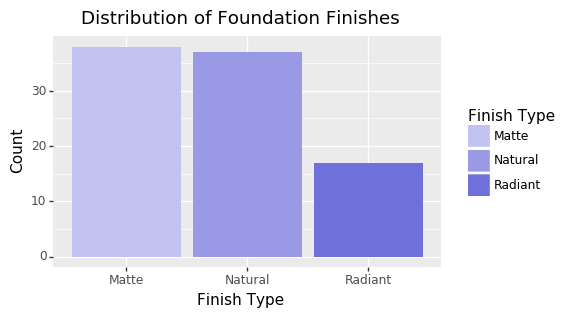

<ggplot: (-9223372029297514422)>

In [9]:
warnings.filterwarnings("ignore")
finish = [df[df['name'] == i].iloc[0]['finish'] for i in df['name'].unique()]
finish_df = pd.DataFrame({'product': df['name'].unique(), 'finish': finish})
finish_df = finish_df[~finish_df['finish'].isna()]

(p9.ggplot(finish_df, aes('finish')) + 
 geom_bar(aes(fill = 'finish')) +
 ggtitle('Distribution of Foundation Finishes') + 
 xlab('Finish Type') +
 ylab('Count') + 
 theme(figure_size = (5,3)) +
 labs(fill = 'Finish Type') +
 scale_fill_manual(values = ['#c2c2f0', '#9999e6', '#7070db']))

The plot below shows the average rating of different foundation finishes. Finish does not seem to have any effect on average rating, which suggests that customers do not seem to view any type of foundation finish as particularly better or hihgher-performing compared to other types of foundation finish.

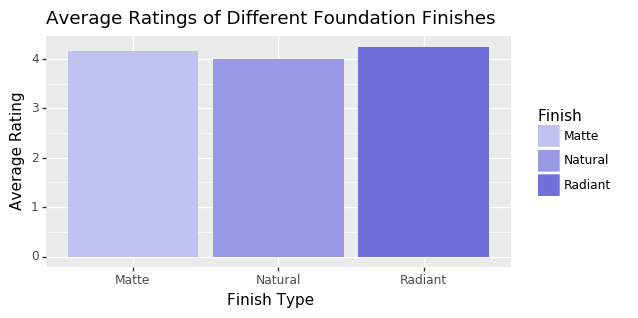

<ggplot: (-9223372029297508394)>

In [10]:
warnings.filterwarnings("ignore")
finish_df2 = df.groupby('finish').mean()
finish_df2['Finish'] = finish_df2.index

(p9.ggplot(finish_df2, aes(x = 'Finish', y = 'rating', fill = 'Finish')) + 
 geom_bar(stat = 'identity') +
 ggtitle('Average Ratings of Different Foundation Finishes') + 
 xlab('Finish Type') +
 ylab('Average Rating') + 
 theme(figure_size = (6,3)) +
 scale_fill_manual(values = ['#c2c2f0', '#9999e6', '#7070db']))

The plot below shows the average price of foundations by finish. It does not seem that finish has any effect on average price. However, natural finish foundations have the highest average price out of the three.

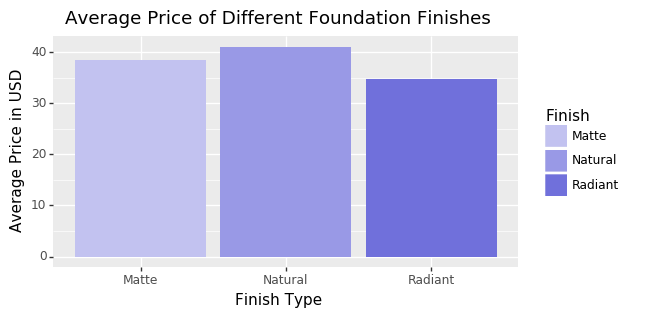

<ggplot: (-9223372029297848625)>

In [11]:
(p9.ggplot(finish_df2, aes(x = 'Finish', y = 'price', fill = 'Finish')) + 
 geom_bar(stat = 'identity') +
 ggtitle('Average Price of Different Foundation Finishes') + 
 xlab('Finish Type') +
 ylab('Average Price in USD') + 
 theme(figure_size = (6,3)) +
 scale_fill_manual(values = ['#c2c2f0', '#9999e6', '#7070db']))

### Distribution of Foundation Coverage
<a id = "disc"></a>

In addition to finish, many brands also give Sephora their foundation coverage information. Foundations can have three different types of coverages: full, light, and medium. Their meanings are fairly intuitive as full means that the coverage is full where as light means that the coverage is light and will not cover up major blemishes. Below, we are going to follow the same steps as we did for foundation finish to see what the distribution of coverage is among foundations sold at Sephora. Once again, the plots below only have about half of the foundations that Sephora sells because many of the foundations do not display this information on their website

As we can see from the plot below, the majority of foundations have medium coverage though full coverage foundations are quite common as well. Light coverage foundations do not seem to be as popular. 

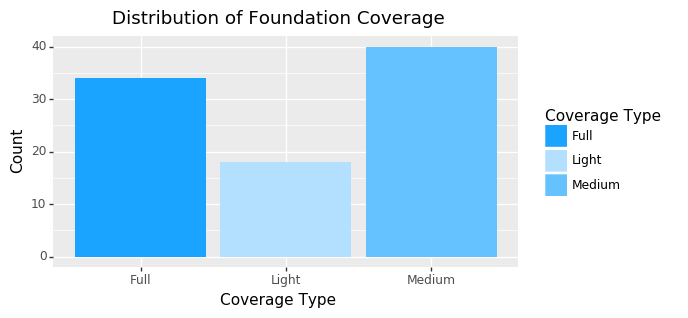

<ggplot: (7556927145)>

In [12]:
coverage = [df[df['name'] == i].iloc[0]['coverage'] for i in df['name'].unique()]
coverage_df = pd.DataFrame({'product': df['name'].unique(), 'coverage': coverage})
coverage_df = coverage_df[~coverage_df['coverage'].isna()]

(p9.ggplot(coverage_df, aes('coverage')) + 
 geom_bar(aes(fill = 'coverage')) +
 ggtitle('Distribution of Foundation Coverage') + 
 xlab('Coverage Type') +
 ylab('Count') + 
 theme(figure_size = (6,3)) +
 labs(fill = 'Coverage Type') +
 scale_fill_manual(values = ['#1aa3ff','#b3e0ff', '#66c2ff']))

Below are the average ratings of different foundation coverage types. Once again, the average rating does not seem to change much by coverage type. However, medium coverage foundations seem to score a little higher in average reviews than light or medium coverage foundations.

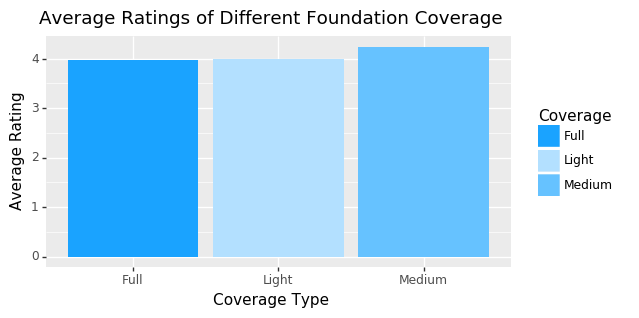

<ggplot: (7542251689)>

In [13]:
coverage_df2 = df.groupby('coverage').mean()
coverage_df2['Coverage'] = coverage_df2.index

(p9.ggplot(coverage_df2, aes(x = 'Coverage', y = 'rating', fill = 'Coverage')) + 
 geom_bar(stat = 'identity') +
 ggtitle('Average Ratings of Different Foundation Coverage') + 
 xlab('Coverage Type') +
 ylab('Average Rating') + 
 theme(figure_size = (6,3)) +
 scale_fill_manual(values = ['#1aa3ff','#b3e0ff', '#66c2ff']))

Below is the average price of foundations by foundation coverage type. Full coverage foundations tend to be a bit more expensive, but medium foundations are surprisingly the cheapest. You would think that medium coverage foundations require more product than light coverage foundations, and thus, would be more expensive. However, that does not seem to be the case.

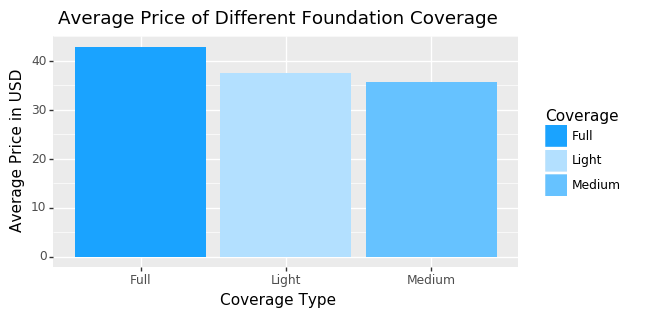

<ggplot: (7555872460)>

In [14]:
(p9.ggplot(coverage_df2, aes(x = 'Coverage', y = 'price', fill = 'Coverage')) + 
 geom_bar(stat = 'identity') +
 ggtitle('Average Price of Different Foundation Coverage') + 
 xlab('Coverage Type') +
 ylab('Average Price in USD') + 
 theme(figure_size = (6,3)) +
 scale_fill_manual(values = ['#1aa3ff','#b3e0ff', '#66c2ff']))

### Distribution of Formulation Types
<a id = "disf"></a>

The final thing we wanted to see before diving a little deeper into the analysis is the distribution of foundation formulation types. Foundation formulation can come in five different ways: cream, liquid, loose, pressed, and stick. From the plot below, we can see that liquid foundations are the most common type of foundation. Generally, women use more than one type of foundation. There is the base, which is usually liquid, cream, or stick foundation. And then, to top it off and set the foundation, a pressed or loose powder foundation is applied as well. 

Looking at the plot below, most of the foundations are liquid. However, it is worth noting that the vast majority of foundations did not include the formulation type in the description, so we had no way of pulling out that information. There are only 48 products with formulation type information despite their being 217 total products, so we will have to be cautious about including this data in our models moving forward.

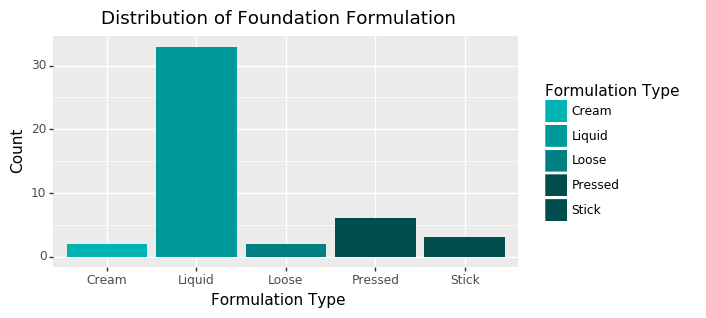

<ggplot: (7539294500)>

In [6]:
#change value for one foundation because Liquid Stick does not exist, it is a liquid foundation
df = df.set_value(201967, 'formulation', 'Liquid')
df = df.set_value(202207, 'formulation', 'Liquid')

formulation = [df[df['name'] == i].iloc[0]['formulation'] for i in df['name'].unique()]
formulation_df = pd.DataFrame({'product': df['name'].unique(), 'formulation': formulation})
formulation_df = formulation_df[~formulation_df['formulation'].isna()]

(p9.ggplot(formulation_df, aes('formulation')) + 
 geom_bar(aes(fill = 'formulation')) +
 ggtitle('Distribution of Foundation Formulation') + 
 xlab('Formulation Type') +
 ylab('Count') + 
 theme(figure_size = (6,3)) +
 labs(fill = 'Formulation Type') +
 scale_fill_manual(values = ['#00b3b3','#009999','#008080', '#004d4d','#004d4d']))

Once again, looking at the average ratings by formulation type, there really is no difference between formulation type of products and their average reviews.

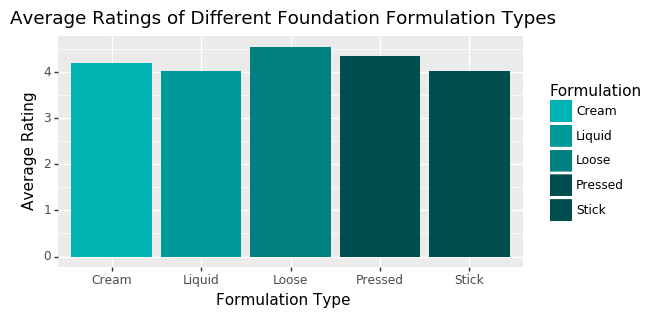

<ggplot: (7539245334)>

In [11]:
formulation_df2 = df.groupby('formulation').mean()
formulation_df2['Formulation'] = formulation_df2.index
formulation_df2 = formulation_df2[formulation_df2['Formulation'] != 'LiquidStick']

(p9.ggplot(formulation_df2, aes(x = 'Formulation', y = 'rating', fill = 'Formulation')) + 
 geom_bar(stat = 'identity') +
 ggtitle('Average Ratings of Different Foundation Formulation Types') + 
 xlab('Formulation Type') +
 ylab('Average Rating') + 
 theme(figure_size = (6,3)) +
 scale_fill_manual(values = ['#00b3b3','#009999','#008080', '#004d4d','#004d4d']))

While the average review of different foundation types seemed to stay the same across all foundation types, the same cannot be said of average price. These bounced around a bit more with the lowest average price of foundation being for loose powder foundations and the highest being for cream foundations. It is worth noting that very few of the foundations are cream foundations, so that may be artificially inflated by lack of many products.

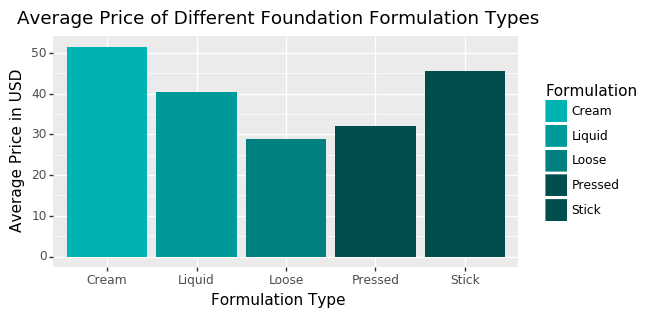

<ggplot: (-9223372029315253907)>

In [12]:
(p9.ggplot(formulation_df2, aes(x = 'Formulation', y = 'price', fill = 'Formulation')) + 
 geom_bar(stat = 'identity') +
 ggtitle('Average Price of Different Foundation Formulation Types') + 
 xlab('Formulation Type') +
 ylab('Average Price in USD') + 
 theme(figure_size = (6,3)) +
 scale_fill_manual(values = ['#00b3b3','#009999','#008080', '#004d4d','#004d4d']))

## Overview of the Brands
<a id = "brand"></a>

After looking at some overall product distributions, we wanted to see what was going on with the brands in our data, so we did some analysis on the differences between brands. The reason we will only go as granular as brands is because we are dealing with 217 products, and that is too many analyze individually. Thus, we felt brand was the most appropriate way of grouping our products. The reason is for this is because each brand has their own standards for formulation of product, and customer bases tend to stick to a brand. For example, many beauty YouTubers will try new foundations from a brand and cite the fact that they liked a previous foundation from the same brand as their reasoning for trying the new foundation. In other words, brand loyalty is important in the makeup industry.

### Number of Reviews per Brand
<a id = "numrevbrand"></a>

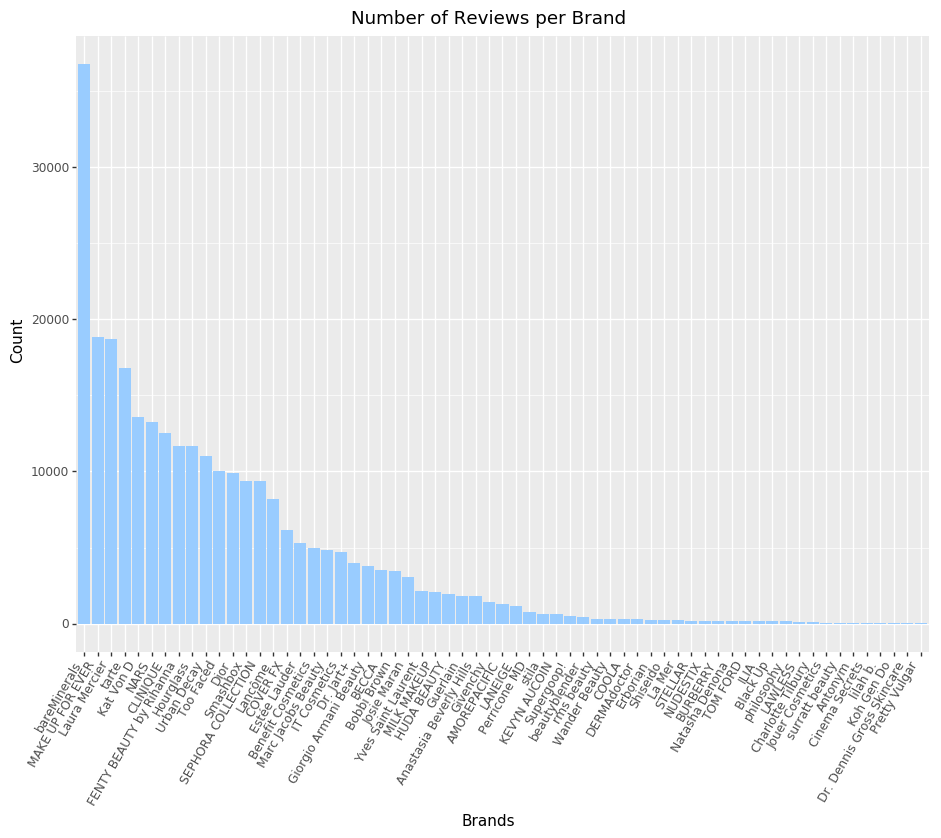

<ggplot: (-9223372029298931175)>

In [18]:
#reorder data frame by value counts of brand
brand_list = df['brand'].value_counts().index.tolist()
brand_cat = CategoricalDtype(categories=brand_list, ordered = True)
df['brand_cat'] = df['brand'].astype(str).astype(brand_cat)


(p9.ggplot(df, aes('brand_cat')) +
geom_bar(fill="#99ccff") +
theme(figure_size = (11,8)) +
theme(axis_text_x=element_text(rotation=60, hjust=1)) +
ggtitle('Number of Reviews per Brand') + 
xlab('Brands') + 
ylab('Count'))

The most popular brand by reviews is Bare Minerals, and it is not particularly close. All of Bare Minerals' products pull in a total of over 30,000 reviews. The next closest brands are Laura Mercier and MAKE UP FOR EVER. Both brands pull in slightly below 20,000 total reviews. 

From a foundation standpoint, it makes sense that Bare Minerals is so popular. Their main focus when it comes to what they sell is foundation and mainly other face cosmetics like blush. Using a bit of anecdotal evidence, most girls when I was in middle and high school only used M.A.C. or Bare Minerals for their foundation. Brands like tarte, Stila, and Urban Decay were still popular but for other products like eyeshadow, eyeliner, mascara, lipstick, and more. Bare Minerals also helped popularize loose mineral powders for foundation as opposed to compact powders. Loose, mineral powders remain to be very popular among a whole host of brands today.

### Average Review by Brand
<a id = "avrevbrand"></a>

In [19]:
#create new brand_df data frame with aggregated info about brands
brands = list(df['brand'].unique())
avg_reviews = [round(df[df['brand'] == i]['rating'].mean(),2) for i in brands]
count = df['brand'].value_counts()
brand_df = pd.DataFrame({'brand':brands, 'AverageReview':avg_reviews, 'Count': count}).reset_index(drop=True)
brand_df.head()

,brand,AverageReview,Count
0,FENTY BEAUTY by Rihanna,4.10,36814
1,MAKE UP FOR EVER,4.07,18829
2,Giorgio Armani Beauty,4.25,18737
3,Estée Lauder,4.39,16834
4,IT Cosmetics,4.01,13552


In [20]:
#function to find 95% CI for ratings
def ninety_five_CI(brand):
    
    """
    input: brand
    output: lower and upper confidence limits for brand in data frame
    """
    dat = df[df['brand'] == brand]
    sdv = np.std(dat['rating'])
    lower = np.mean(dat['rating']) - (1.96*(sdv/math.sqrt(len(dat))))
    upper = np.mean(dat['rating']) + (1.96*(sdv/math.sqrt(len(dat))))
    return(lower, upper)

#add upper and lower limits of rating CI to brand_df
brand_df['lower_rating_lim'] = [ninety_five_CI(i)[0] for i in brand_df['brand']]    
brand_df['upper_rating_lim'] = [ninety_five_CI(i)[1] for i in brand_df['brand']]

#reorder brand_df to go in descending order based on 'AverageReview'
brand_order1 = brand_df.sort_values('AverageReview').reset_index(drop=True)['brand']
brand_df['brand'] = pd.Categorical(brand_df['brand'], categories=brand_order1, ordered=True)

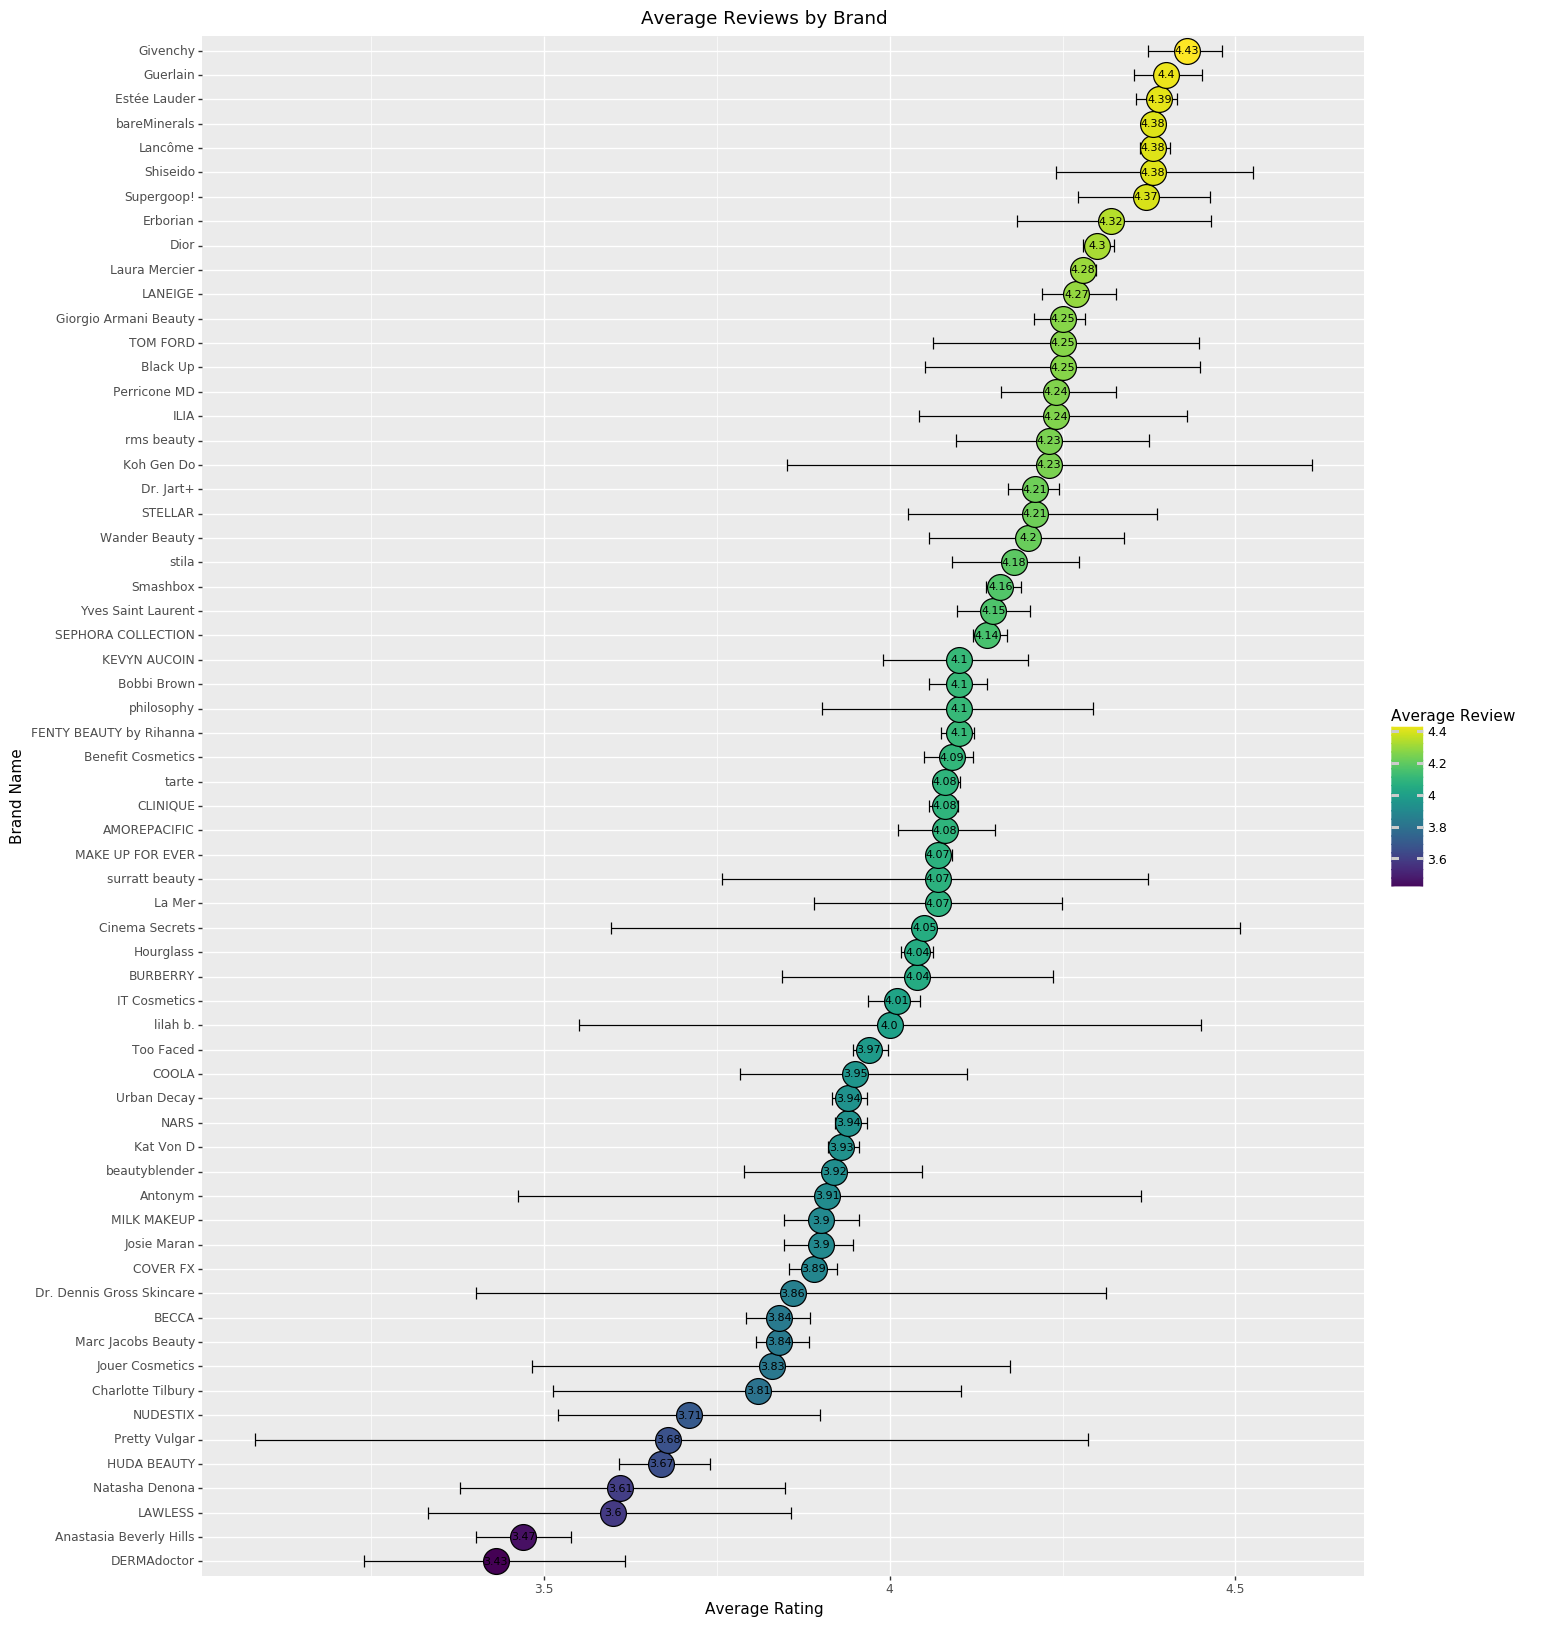

<ggplot: (-9223372029298928731)>

In [21]:
(p9.ggplot(brand_df, aes(x='brand',y='AverageReview', label = 'AverageReview', fill = 'AverageReview')) + 
geom_errorbar(aes(ymin='lower_rating_lim', ymax='upper_rating_lim'), color="black") +
geom_point(stat='identity', size = 10) +
geom_text(color = 'black', size = 8) +
theme(figure_size = (15,20)) +
coord_flip() +
ggtitle('Average Reviews by Brand') +
ylab('Average Rating') +
xlab('Brand Name') +
labs(fill = 'Average Review'))

The average review for foundation by brand is shown above. As can be seen, the lowest average reviews rest around 3.4 while the highest go to 4.43.

Something that I think is worth noting is how many of the most expensive / "luxury" brands have the highest ratings. The highest rated foundations come from Givenchy, Guerlain, Estée Lauder, and Lâncome. One of my favorite luxury foundation brands, Giorgio Armani, also comes in the top 20. Brands that tend to gear themselves more towards a younger generation such as Too Faced, Kat Von D, Urban Decay, Benefit Cosmetics, and Anastasia Beverly Hills tend to not do as well in average ratings. These brands that go for a younger crowd also tend to be a bit cheaper, though at Sephora, it is rare to find any makeup that can rival drug store makeup prices.

The question that may be worth exploring in the future is if ratings for luxury brands are inflated due to the customer wanting to like an expensive product. For example, I love my Giorgio Armani Luminous Silk Foundation. I also pay over $60 for each bottle. It is possible that I am less willing to criticize the foundation because of the hefty price I paid. In addition, I am also enamored by the packaging and luxuriousness of just the packaging. That could also be an incentive for me to be less critical. Perhaps in the future, it would be an interesting endeavor to do a some sort of sentiment analysis of the text of reviews for all the foundations.

I would also like to point out that Bare Minerals performs extraordinarily well for having over 30,000 reviews.

The black bars around the points represent the 95-percent confidence intervals for the average reviews. I felt that it was insufficient to only include the average reviews because that does not account for the number of people reviewing the product. For example, let's say we have two products: Product A and Product B. Product A has an average rating of 5 stars out of 5 stars but only has 1 review. Product B has an average rating of 4.8 stars with over 50 reviews. It would make sense to trust Product B since it has far more reviews. This is the reason I included the confidence intervals. The wider the confidence interval, the less reviews the product has, which is why the interval is larger, and thus, the average review is less trustworthy. On the other hand, Bare Minerals' 95-percent confidence interval is not even visible because it has over 30,000 reviews. Thus, we do not have to be wary of the brand's high rating.

### Bayesian Adjustment of Average Review
<a id = "bayesian"></a>

In the plot above, we showed the average rating of each brand with a 95 percent confidence band. The confidence band shows how much we should trust the average rating because the smaller the confidence band, the more reviewers that reviewed products from that brand. Now, we want to be able to adjust the average rating to adjust for the total number of people who reviewed the products from the brand. In order to do this, we are going to attempt to use a Bayesian model with our multicategory rating data. Because our categorical data is ordinal, we are going to take the sum of the marginal posterior distributions multiplied by the weight of each rating category to get our final Bayesian adjusted score. The goal is that the Bayesian adjusted score will push down the score of brands with fewer reviews.

#### Statistics Behind Code Below:
<a id = "statscodebelow"></a>

#### Multicategory Data
<a id = "multicat"></a>
We are going to assume our data has a multinomial distribution with a dirichlet prior. There is no particular science of creating priors. The reason I am choosing a multinomial distribution is because each of my ratings is a category. 

The theory goes like this:
Let $X^{(i)} =$ sampling units from category i.

$X: (X^{(1)}, X^{(2)}, X^{(3)}, X^{(4)}, X^{(5)})$ is singular $Multinomial_{5}(n; \theta_{1}, \theta_{2}, ..., \theta_{5})$ where $\theta_{i} =$ population fraction for category i.

$0 < \theta_{i} < 1$ for all $i$ in (1,5).

We also know that $$\sum_{i = 1}^5 \theta_{i} = 1$$ and $$\sum_{i = 1}^5 X^{i} = n$$ where $n$ is the sum of the total number of reviews we have.

We say that $(X^{(1)}, ..., X^{(5)})$ (conditional of $\theta = (\theta_{1}, ..., \theta_{5})$) follows the (singular) $Multinomial_{5}(n; \theta_{1}, \theta_{2}, ..., \theta_{5})$ if the joint probability mass function of $(X^{(1)}, ..., X^{(5)})$ is given by $p(x^{(1)}, ..., x^{(5)})$ = $$\frac{n!}{x^{1}!...x^{5}!}\theta^{x^{1}}_1...\theta^{x^{5}}_5$$ 

$$\propto \theta_1^{x^{(1)} + \alpha_{1} - 1}...\theta_4^{x^{(4)} + \alpha_{4} - 1}(1 - \sum_{j=1}^{5-1}\theta_{j})^{x^{(5)}}\mathbb{1}_{\Delta_{5}(\theta_{1}, ..., \theta_{4})}$$

where $x^{(i)} \geq 0$ are integers and $\sum_{j=1}^{5}x^{j} = n$. Here, $\sum_{j=1}^{5}\theta_{j} = 1$ and $0 < \theta_{j} < 1$ for $j = 1,...,5$.

#### Conjuage Prior: Dirichlet Prior
Aim: Our aim is to find a class of prior for parameter $(\theta_1, ..., \theta_5)$. Notice that, due to the relationship $\sum_{j=1}^{5}\theta_j = 1$, a joint density for $(\theta_1, ..., \theta_5)$ does not exist. However, by convention, if we drop $\theta_5$ (since it can be expressed as $1 - \sum_{j=1}^{5-1}\theta_j$), then we can define a continuous joint distribution for $(\theta_1, ..., \theta_4)$.

The p.d.f. of $(\theta_1, ..., \theta_4)$ can be written as:

$$\pi(\theta_1, ... \theta_4) = \frac{1}{D(\alpha_1, \alpha_2, ..., \alpha_4)}\theta_1^{\alpha_1 - 1}...\theta_4^{\alpha_4 - 1}(1 - \sum_{j=1}^4\theta_j)^{\alpha_5 - 1}\mathbb{1}_{\Delta_{5}(\theta_{1}, ..., \theta_{4})}$$

where $\Delta_k = \{(\theta_1, ...,\theta_{5-1}): 0 < \theta_i < 1$ for all i; $\sum_{i=1}^4\theta_i < 1\}$.

#### Posterior Distribution

The posterior distribution can be written as:

$$\pi(\theta_1, ..., \theta_4 | X^{(1)}, ..., X^{(5)}) \propto p(X^{(1)}, ..., X^{(5)} | \theta_1, ..., \theta_4)\pi(\theta_1, ..., \theta_4)$$

This is equivalent to $Dirichlet_5(\alpha_1 + x^{(1)}, ..., \alpha_1 + x^{(5)})$.

In order to find the new Bayesian rating, we are going to find the expectation of the expectation of the marginal posterior distribution for each $\theta_j$ for any given brand. After that, we will multply that value by the rating $j$ because our multicategory data is ordinal. Then, we will sum all five expectations of the marginal posterior multiplied by $j$ to get our new Bayesian average. 

- marginal posterior distribution of $\theta_j$ is $Beta(\alpha_j + x^{(j)}, \sum_{i \neq j}^4\alpha_i + x^{(i)})$
- expectation of the marginal posterior distribution of $\theta_j$: $E[\pi(\theta_j|X^{(1)}, ..., X^{(5)})] = [\frac{\alpha_j + x^{(j)}}{\sum_{i=1}^5\alpha_i + x^{(i)}}]$
- average star value with Bayesian adjustment: $\sum_{j = 1}^5j \times E[\pi(\theta_j|X^{(1)}, ..., X^{(5)})]$

#### Picking a Prior:
In order to keep our prior fairly non-informative (because we don't our Bayesian estimate to weigh the prior too much), the prior is going to be the fraction of reviews that are 1 star, 2 star, etc. for the entire dataset multiplied by 20 such that each $\alpha_j$ in the prior can be written as $20 \times P(j)$.

In [22]:
df['rating'] = df['rating'].astype(int)
alpha_list = [(20*(len(df[df['rating'] == 1])/len(df))),
              (20*(len(df[df['rating'] == 2])/len(df))),
              (20*(len(df[df['rating'] == 3])/len(df))),
              (20*(len(df[df['rating'] == 4])/len(df))),
              (20*(len(df[df['rating'] == 5])/len(df)))]

def bayesian_adj(alphas, brand):
    
    """return bayesian adjusted average for brand"""
    dat = df[df['brand'] == brand]

    exp_one = ((alphas[0] + len(dat[dat['rating'] == 1])))/(20+len(dat))
    exp_two = (2*((alphas[1] + len(dat[dat['rating'] == 2])))/(20+len(dat)))
    exp_three = (3*((alphas[2] + len(dat[dat['rating'] == 3])))/(20+len(dat)))
    exp_four = (4*((alphas[3] + len(dat[dat['rating'] == 4])))/(20+len(dat)))
    exp_five = (5*((alphas[4] + len(dat[dat['rating'] == 5])))/(20+len(dat)))
    
    return exp_one + exp_two + exp_three + exp_four + exp_five

brand_df['bayesian'] = [bayesian_adj(alpha_list, i) for i in brand_df['brand']]

In [23]:
#creating new data frame for plot legend
ratings_df_1 = brand_df[['brand', 'AverageReview']]
ratings_df_2 = brand_df[['brand', 'bayesian']]

ratings_df_1['type'] = 'average'
ratings_df_2['type'] = 'bayesian'

ratings_df_1 = ratings_df_1.rename(index=str, columns={'AverageReview': 'Score'})
ratings_df_2 = ratings_df_2.rename(index=str, columns={'bayesian': 'Score'})

ratings_df_list = [ratings_df_1,ratings_df_2]
ratings_df = pd.concat(ratings_df_list)

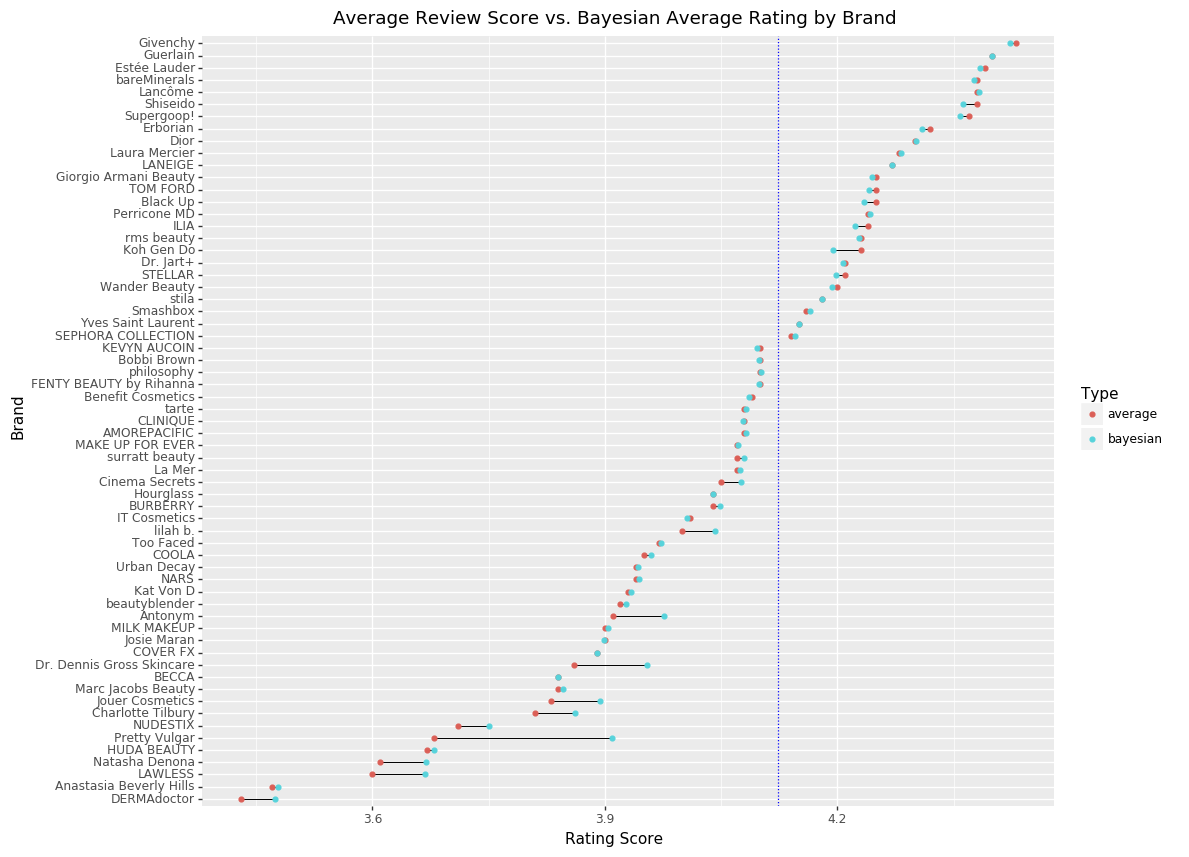

<ggplot: (7552597999)>

In [24]:
(p9.ggplot() + 
 geom_segment(brand_df, 
              aes(x = 'AverageReview', xend = 'bayesian', y = 'brand', yend = 'brand'),
              size = 0.4) +
 geom_point(ratings_df, aes(x='Score', y = 'brand', color = 'type')) +
 geom_vline(xintercept = df['rating'].mean(), color = 'blue', linetype = 'dotted') +
 theme(figure_size = (11,10)) + 
 ggtitle('Average Review Score vs. Bayesian Average Rating by Brand') +
 xlab('Rating Score') + 
 ylab('Brand') +
 labs(color = 'Type') +
 scale_color_discrete(values = ['Average Rating', 'Bayesian Average']))


Above, we can see how the average moves when we take the Bayesian average. It does exactly what we would expect. With brands that have a smaller number of reviews (larger confidence intervals from the plot before), the prior drags the average towards the global average rating (which is our prior). However, brands that have many reviews do not see much movement at all towards the global average of 4.1 stars. The further away the Bayesian average is from the initial average, the more wary we should be of the average review for the brand. Something to keep in mind is that the new Bayesian average is completely dependent on the prior I picked. I chose the global average of all foundation ratings as my average. Let's say, however, that I decided I wanted to use 3 as my prior such that the rating 3 had the highest weight out of the five ratings. Then, you would see all the ratings move closer to 3, some more than others (based on the number of people who reviewed their product). 

### Average Foundation Price by Brand
<a id = "avfoundpricbrand"></a>


In [25]:
brands = list(df['brand'].unique())
avg_reviews = [round(df[df['brand'] == i]['rating'].mean(),2) for i in brands]
count = df['brand'].value_counts()
brand_df = pd.DataFrame({'brand':brands, 'AverageReview':avg_reviews, 'Count': count}).reset_index(drop=True)

#take average price for each brand and add it to brand_df
brand_df['average_price'] = [round(df[df['brand'] == i]['price'].mean(),4) for i in brand_df['brand']]

#reorder brand_df to go in descending order based on 'average_price'
brand_order = brand_df.sort_values('average_price').reset_index(drop=True)['brand']
brand_df['brand'] = pd.Categorical(brand_df['brand'], categories=brand_order, ordered=True)

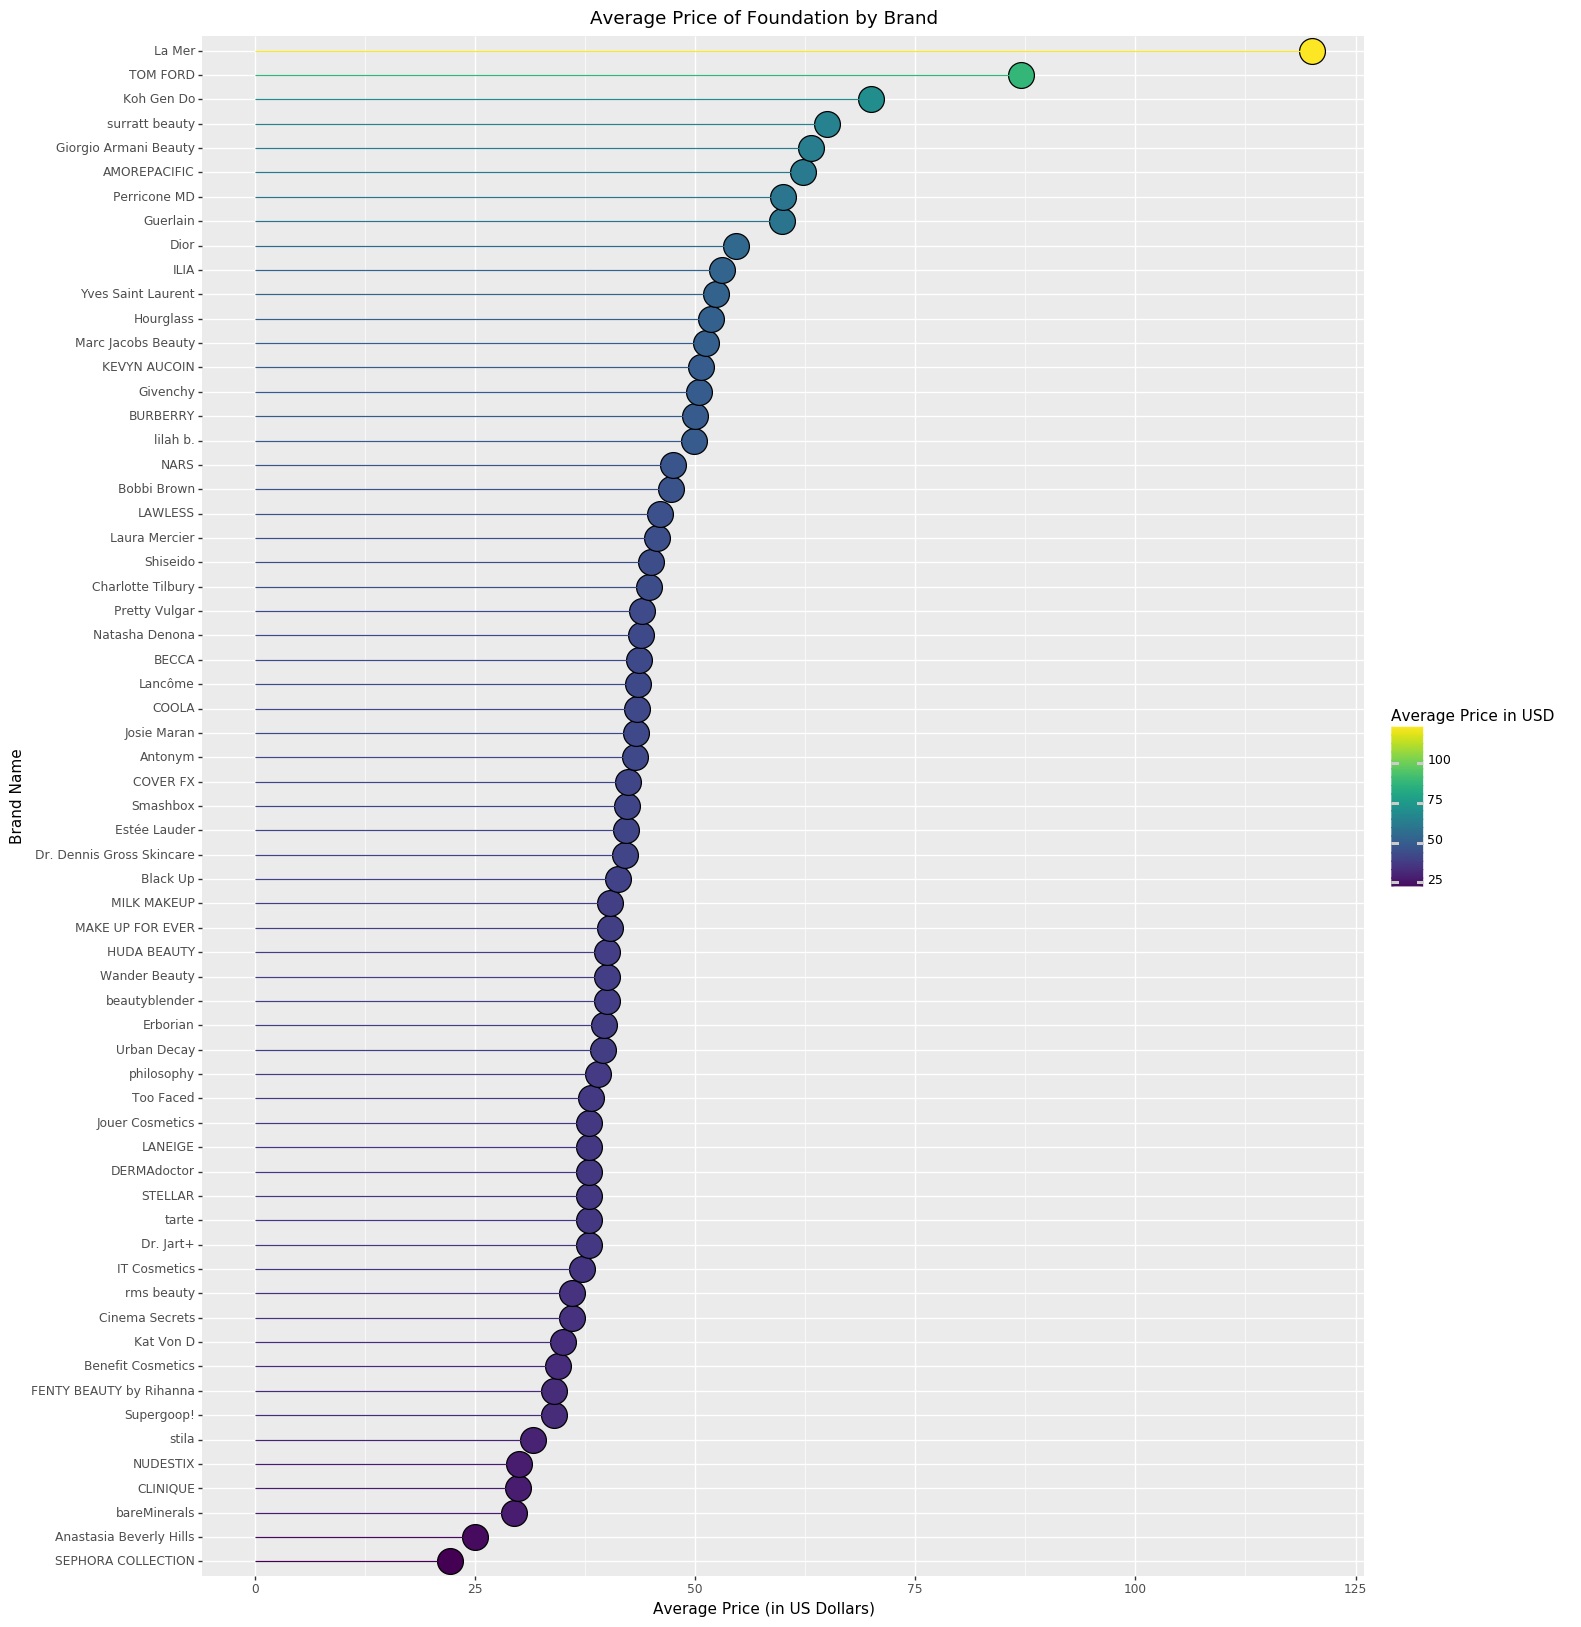

<ggplot: (-9223372029298901665)>

In [26]:
(p9.ggplot(brand_df, aes(x = 'brand', y = 'average_price', label = 'average_price', fill = 'average_price')) + 
geom_point(stat='identity', size = 10) + 
geom_segment(aes(y=0,
                x = 'brand',
                yend = 'average_price',
                xend = 'brand', 
                color = 'average_price')) +
theme(figure_size = (15,20)) +
coord_flip() +
ggtitle('Average Price of Foundation by Brand') +
ylab('Average Price (in US Dollars)') +
xlab('Brand Name') + 
labs(fill = 'Average Price in USD', color = 'Average Price in USD'))

Something else we thought was worth looking into was the relationship between price and brand. Naturally, the more luxurious brands like Tom Ford and La Mer have average prices near or over 100 dollars per foundation. And the Sephora Collection, Sephora's in-house brand, has the lowest average cost that is under 25 dollars per foundation. It is also worth noting that Bare Minerals remains very low in cost for foundation as well compared to other brands.

### How Does the Average Price of a Brand Relate to Its Average Rating?
<a id = 'avpricebrandrel'></a>

One of the reasons we are interested in this is because we wanted to test whether or not a higher price meant that the brand was better. Below, we created a plot with each point as the image of the brand's logo.

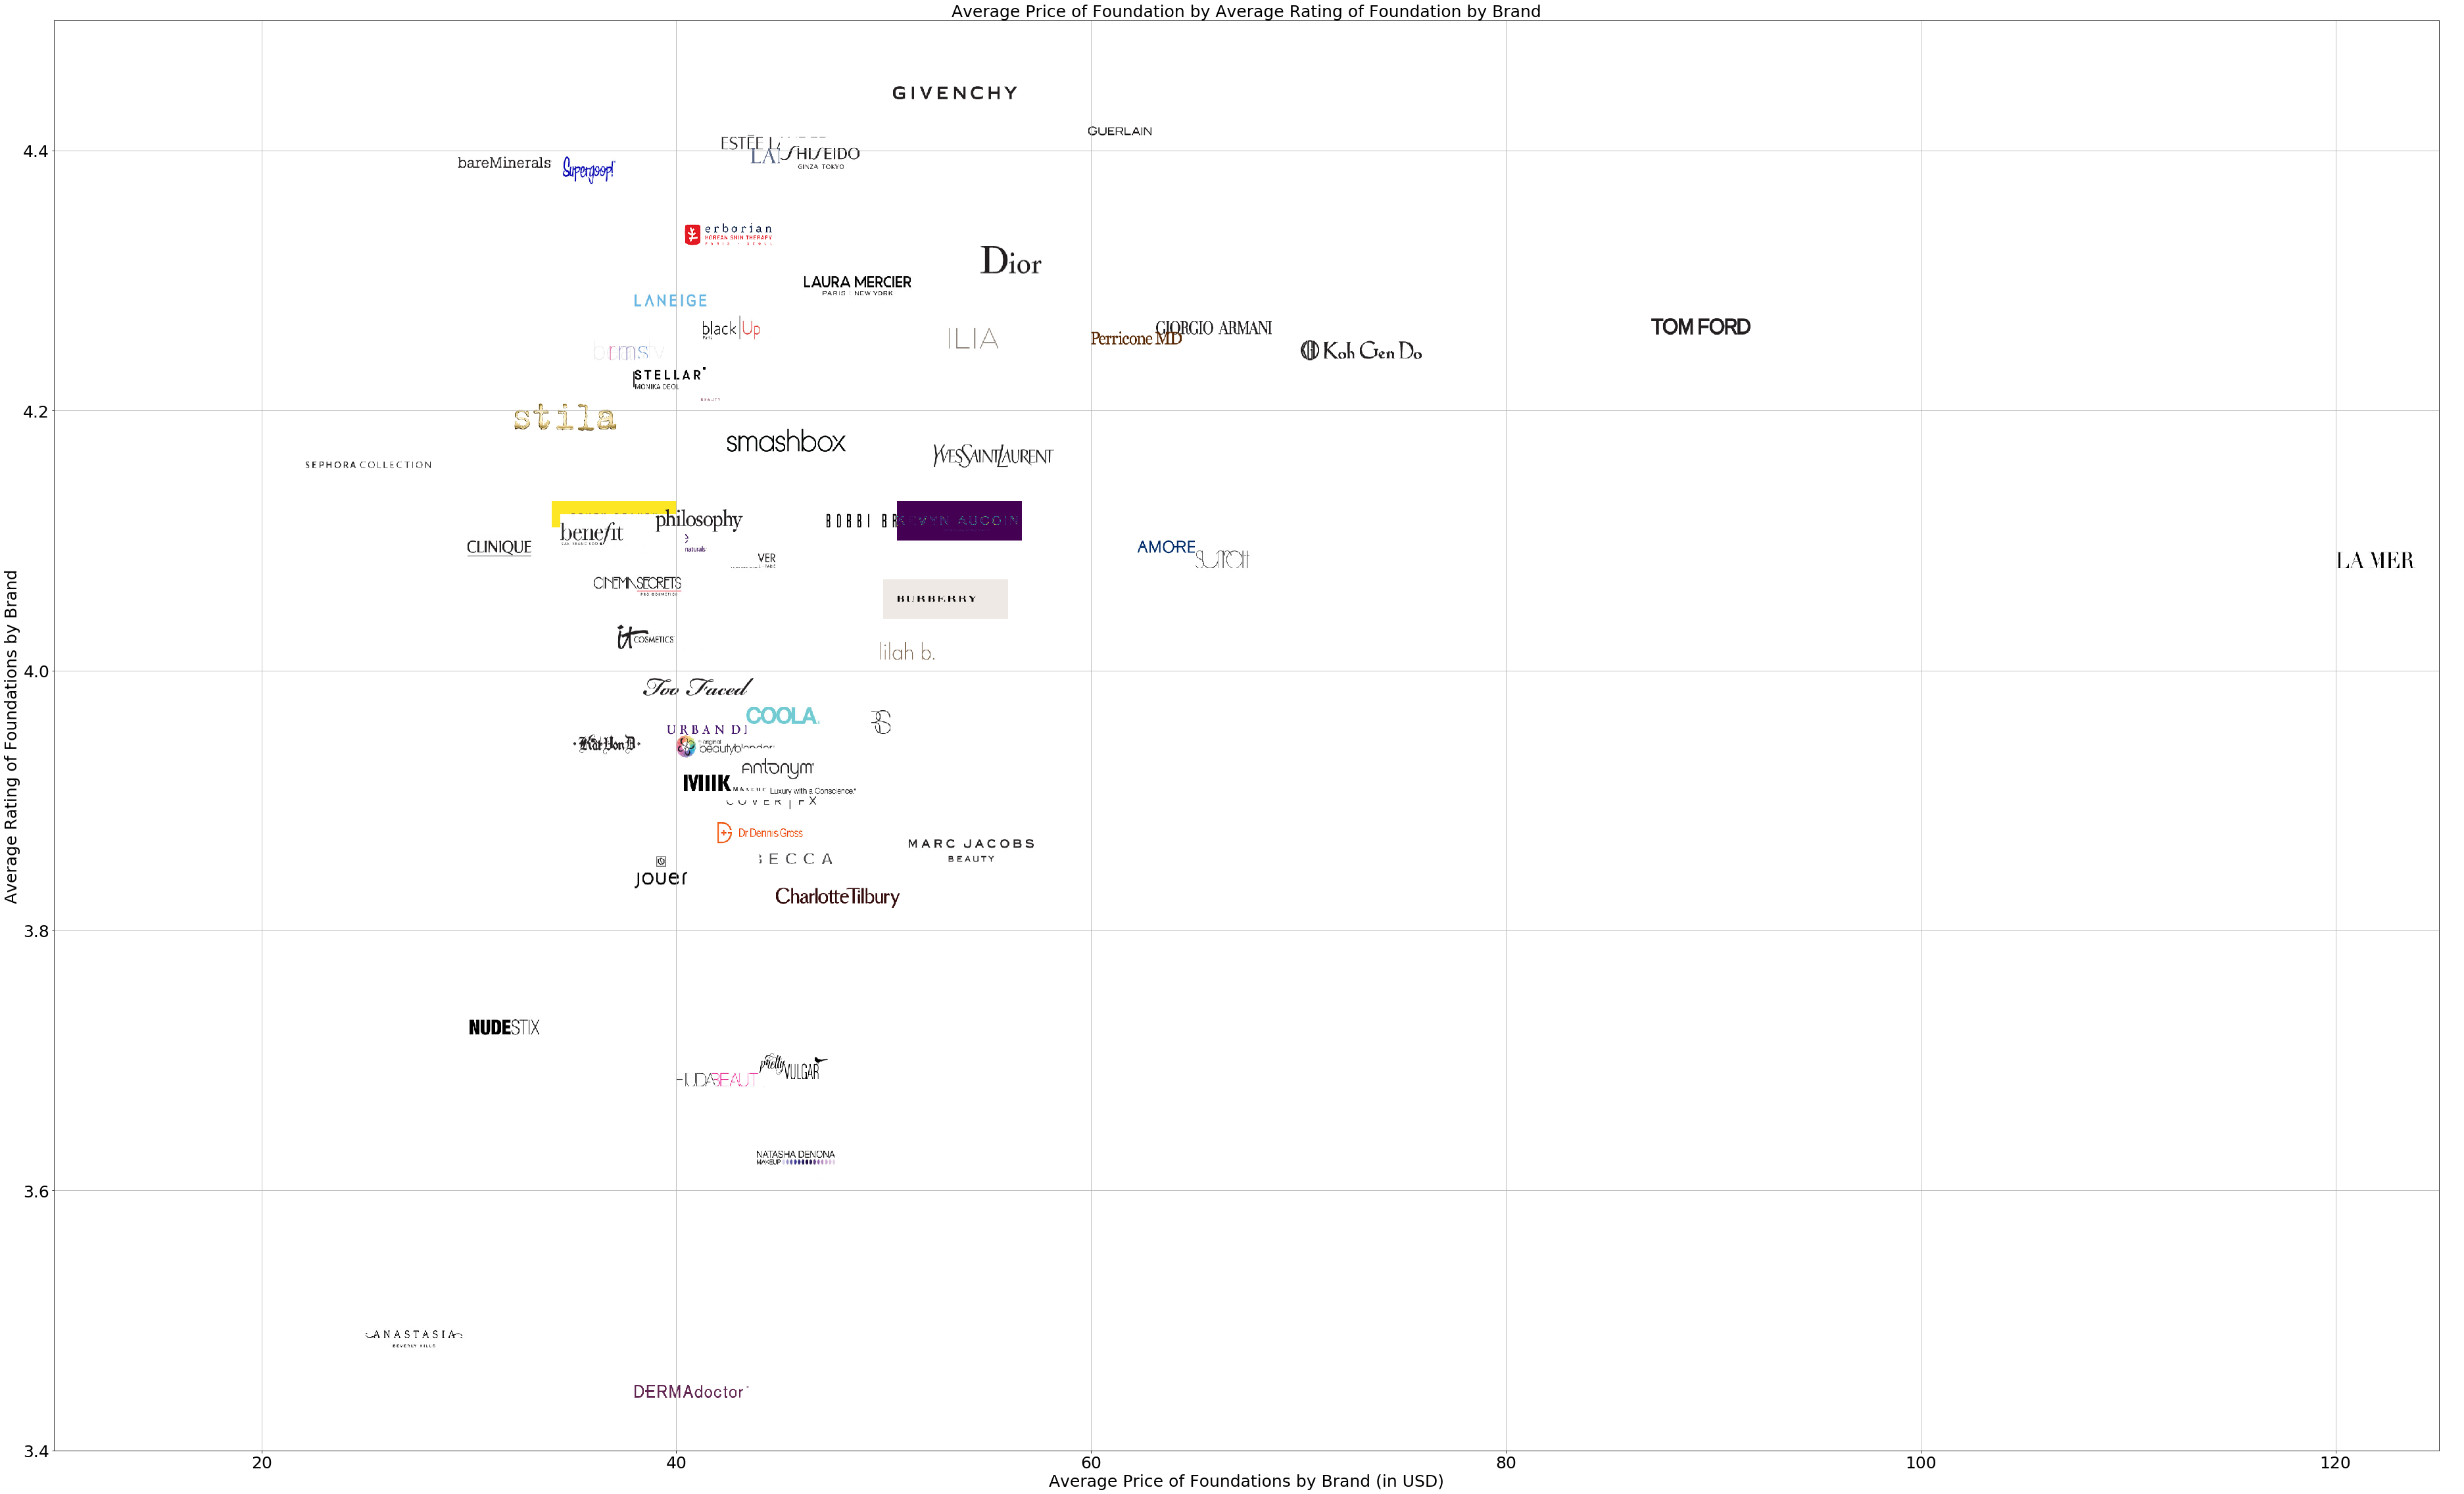

In [27]:
### Adding to brand_df
brand_df['image_path'] = [df[df['brand'] == i].iloc[0]['brand_image_url'] for i in brand_df['brand']]

def read_img(url):
    """Returns image for each url link to image"""
    response = requests.get(url)
    img = Image.open(io.BytesIO(response.content))
    return img

#add column to brand_df that finds every image for brand
brand_df['image'] = [read_img('https://www.sephora.com' + i) for i in brand_df['image_path']]

#get numpy array for every image
brand_df['image_array'] = [np.array(i) for i in brand_df['image']]


### Plotting
fig = plt.figure()
ax = fig.add_subplot(111)
def plotImage(x, y, im):
    
    """Returns point on plot with x,y coordinates and img for point"""
    
    #code from: https://stackoverflow.com/questions/25329583/matplotlib-using-image-for-points-on-plot
    
    bb = Bbox.from_bounds(x,y,6,0.03)  
    bb2 = TransformedBbox(bb,ax.transData)
    bbox_image = BboxImage(bb2,norm = None,origin=None,clip_on=False)

    bbox_image.set_data(im)
    ax.add_artist(bbox_image)

#plot point for every row in brand_df
for i,j,k in zip(brand_df['average_price'], brand_df['AverageReview'], brand_df['image_array']):
    plotImage(i,j,k)
    
ax.set_ylim(3.4,4.5)
ax.set_xlim(10,125)
ax.set_title('Average Price of Foundation by Average Rating of Foundation by Brand', fontsize = 25)
ax.tick_params(axis='both', labelsize = 25)
ax.set_xlabel('Average Price of Foundations by Brand (in USD)', fontsize = 25)
ax.set_ylabel('Average Rating of Foundations by Brand', fontsize = 25)
plt.gcf().set_size_inches(65,40)
plt.grid(b=True, axis='both')

Looking at this plot, it is clear to us that there is no real relationship between average price of a brand and average rating. Most of the brands seem to concentrate around 20 to 60 dllars for foundations, but the few brands that break away from this are Koh Gen Do, Tom Ford, and La Mer. In addition, we see a concentration of high-end brands in approximately the top-right of the plot. These brands include La Mer, Tom Ford, Koh Gen Do, Yves Saint Laurent, Giorgio Armani, Dior, and Givenchy.

## Reviewer Characteristics Utilization
<a id="revcharutil"></a>

In this next part, we will utilize the information that reviewers have provided about themselves and their experiences with the product.

### Skin Type 
<a id='skintype'></a>

#### Number of Reviews per Skin Type

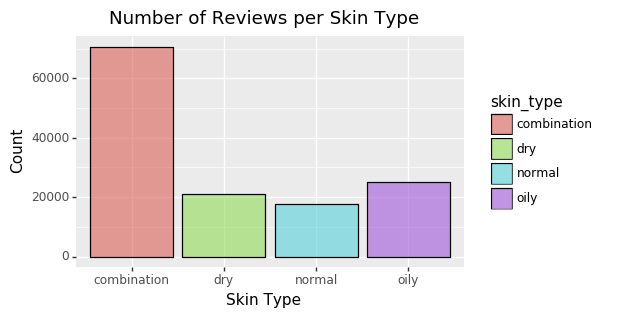

<ggplot: (-9223372036566104765)>

In [28]:
skin_type_db = df[~df['skin_type'].isna()]
(p9.ggplot(skin_type_db, aes(x='skin_type',fill="skin_type")) +
geom_bar(color="black", alpha = 0.6) +
theme(figure_size = (5,3)) +
ggtitle('Number of Reviews per Skin Type') + 
xlab('Skin Type') + 
ylab('Count') )

The majority of reviews are written by people who have a "combination" skin type, meaning both dry and oily. This is because skin type can fluctuate over time, and some parts of the face can be oily while others are dry. This may also be because when people are asked to identify what type of skin they have, it can be difficult to categorize it as one or the other. Therefore, they say their skin type is a combination in order to encompass all the fluctuations that may occur.

### Skin Concerns
<a id='skinconcerns'></a>

#### Skin Concerns by Age

In [29]:
skin_concern=df[~df["skin_concerns"].isna()]
skin_concern=skin_concern[~skin_concern["age"].isna()]
skin_concern=skin_concern[["skin_concerns","age"]]

skin_age_group=skin_concern.groupby(["skin_concerns","age"]).size().reset_index(name="count")
skin_age_group=pd.merge(skin_age_group,skin_concern.groupby(["age"]).size().reset_index(name="total")[["age","total"]],on='age')
skin_age_group["count"]=(skin_age_group["count"]/skin_age_group["total"])
skin_age_group=skin_age_group.drop(columns=["total"])

take_out=["cellulite","calluses","cuticles", 'stretchMarks']
skin_age_group=skin_age_group[~(skin_age_group["skin_concerns"].isin(take_out))]

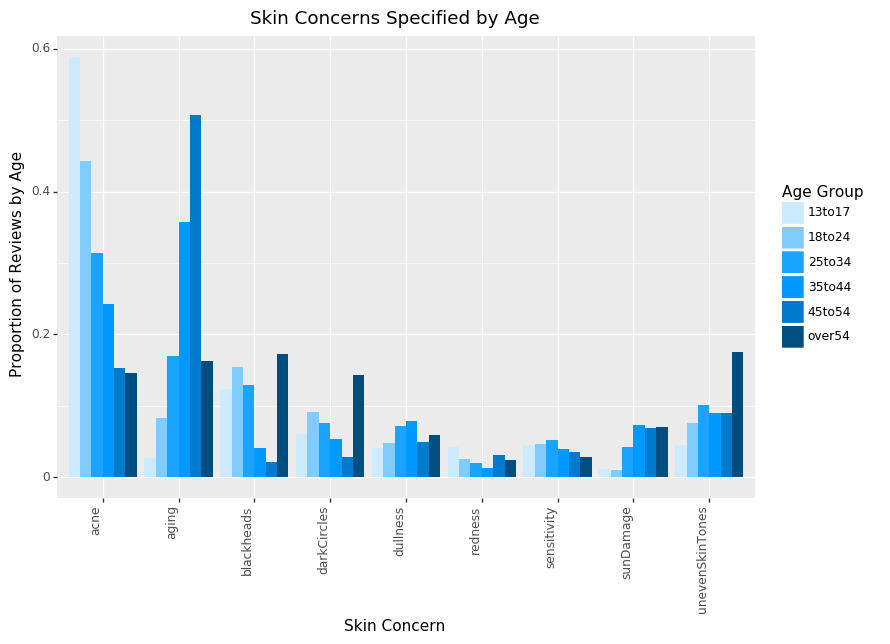

<ggplot: (-9223372029310753087)>

In [30]:
(p9.ggplot(skin_age_group, aes(x='skin_concerns',y="count")) +
geom_bar(aes(fill='factor(age)'),stat="identity",position="dodge") +
theme(figure_size = (9,6)) +
theme(axis_text_x=element_text(rotation=90, hjust=1)) +
ggtitle('Skin Concerns Specified by Age') + 
xlab('Skin Concern') + 
ylab('Proportion of Reviews by Age') +
scale_fill_manual(values = ['#ccebff', '#80ccff', '#1aa3ff', '#0099ff','#007acc', '#004d80']) +
labs(fill = 'Age Group'))#+scale_fill_manual(labels =list(tone_val.keys()),values=skin_palette)+ scale_x_discrete(limits = list(sorted_skin100["brand"]))


In the plot above, we wanted to see how the skin concerns of women changed as they aged. What we see is that acne is the largest concern for women who are between the ages of 13 to 17 and that drops for women consistently as they go into older age groups. Agin surprisingly, does not go up for women as they move into older age groups. While that trend does exist until women are between 45 and 54, the majority of women over 54 do not list aging as their top concern. The largest concern for women over 54 is blackheads and uneven skin tones. Dark circles are make up a small part of overall women's skin concerns, but it makes up a larger proportion of the largest skin concern for women over 54 because dark circles tend to become worse as women age.

### Skin Tone
<a id="skintone"></a>

#### Skin Tone Distribution

In [31]:
#create new df for skin with no NAs for skin tone with important info about customer
skin=df[~df["skin_tone"].isna()]
skin=skin[["brand","name","rating","skin_type","eye_color","skin_concerns","skin_tone", "age","price","recommended"]]

#assign numerical value to skin complexion for ranking
tone_val={"porcelain":1,"fair":2,"light":3,"medium":4,"tan":5,"olive":6,"deep":7,"dark":8,"ebony":9}
skin['tone_val'] = pd.Series(skin["skin_tone"], index=skin.index)
skin=skin.replace({"tone_val": tone_val})


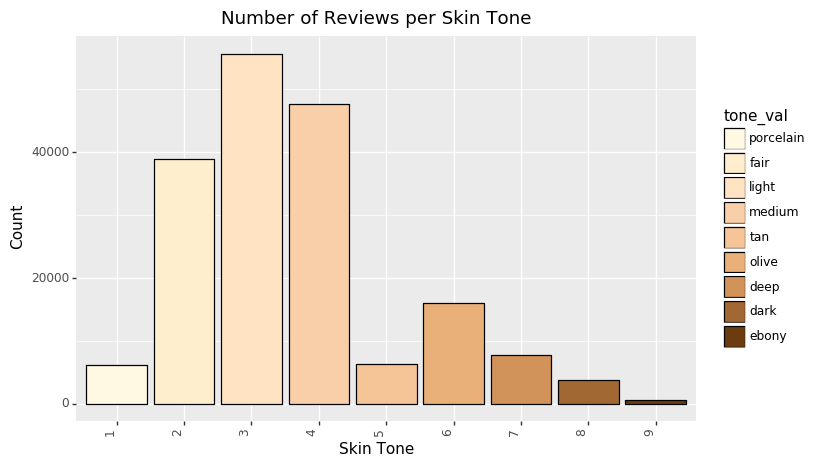

<ggplot: (-9223372029301372258)>

In [59]:
#Distribution of all skin tones given
skin_palette= ["#FFF8E3", "#FFEECD", "#FFE3C3","#F9CFA9", "#F5C598", "#EAB07A", "#D1935A", "#A16834", "#6B3C10"]
skin["tone_val"]=skin["tone_val"].astype(str)
(p9.ggplot(skin, aes(x='tone_val',fill="tone_val")) +
geom_bar(color="black") +
theme(figure_size = (8,5)) +
theme(axis_text_x=element_text(rotation=90, hjust=1)) +
ggtitle('Number of Reviews per Skin Tone') + 
xlab('Skin Tone') + 
ylab('Count')) +scale_fill_manual(labels =list(tone_val.keys()),values=skin_palette)

The vast majority of reviewers fall into skin complexions between porcelain, fair, light, and medium. While there does seem to be a little spike for people of olive complexion, there does not seem to be much representation of those who are deep, dark, or ebony. Part of this could be possibly attributed to the lack of shade diversity among many foundations. 

In [69]:
#Subset the products that have over a hundred reviews that provide skin tone
count=skin.groupby(["name"]).size().reset_index(name="count")
skin100 = count[count["count"]>=100]
skin100=skin[skin["name"].isin(skin100["name"])]

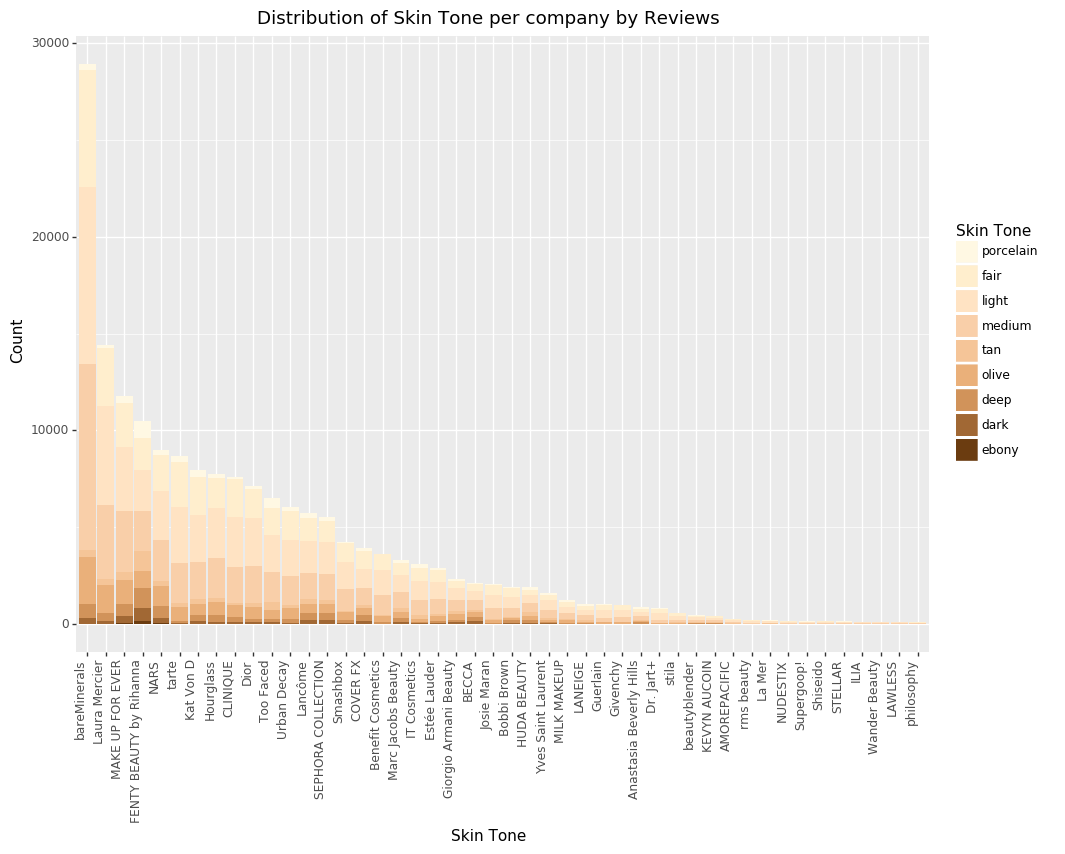

<ggplot: (-9223372029302684107)>

In [73]:
#Now, let's see company dist.
(p9.ggplot(skin100, aes(x='brand',fill="tone_val")) +
geom_bar() +
theme(figure_size = (11,8)) +
theme(axis_text_x=element_text(rotation=90, hjust=1)) +
ggtitle('Distribution of Skin Tone per company by Reviews') + 
xlab('Skin Tone') + 
ylab('Count')+
scale_fill_manual(labels =list(tone_val.keys()),values=skin_palette)+ 
scale_x_discrete(limits = list(sorted_skin100["brand"])) + 
labs(fill = 'Skin Tone'))
#overall population

This plot only shows the brands that have at least 100 reviews with skin tone information. It only further confirms what we already knew from the plot before. Most of the reviewers of these brands are in the lighter skin ranges. However, what is worth noting is how, for most brands, they do not have any people of ebony skin tones reviewing their products. In fact, the only brand in this plot with any noticable ebony representation is Fenty. This is not surprising because Fenty did get a lot of press for having 40 different foundation shades when their first foundation debuted. MAKE UP FOR EVER also has a very popular foundation (Ultra HD) that has 40 shades, but the actual diversity within those shades is much higher in Fenty's foundation. What this plot shows us is that there is a large group of women that the cosmetics industry, particularly in Western countries, is failing to create products for. 

#### Distribution of Reviewer's Skin Tone by Foundation (Top 6 Companies)

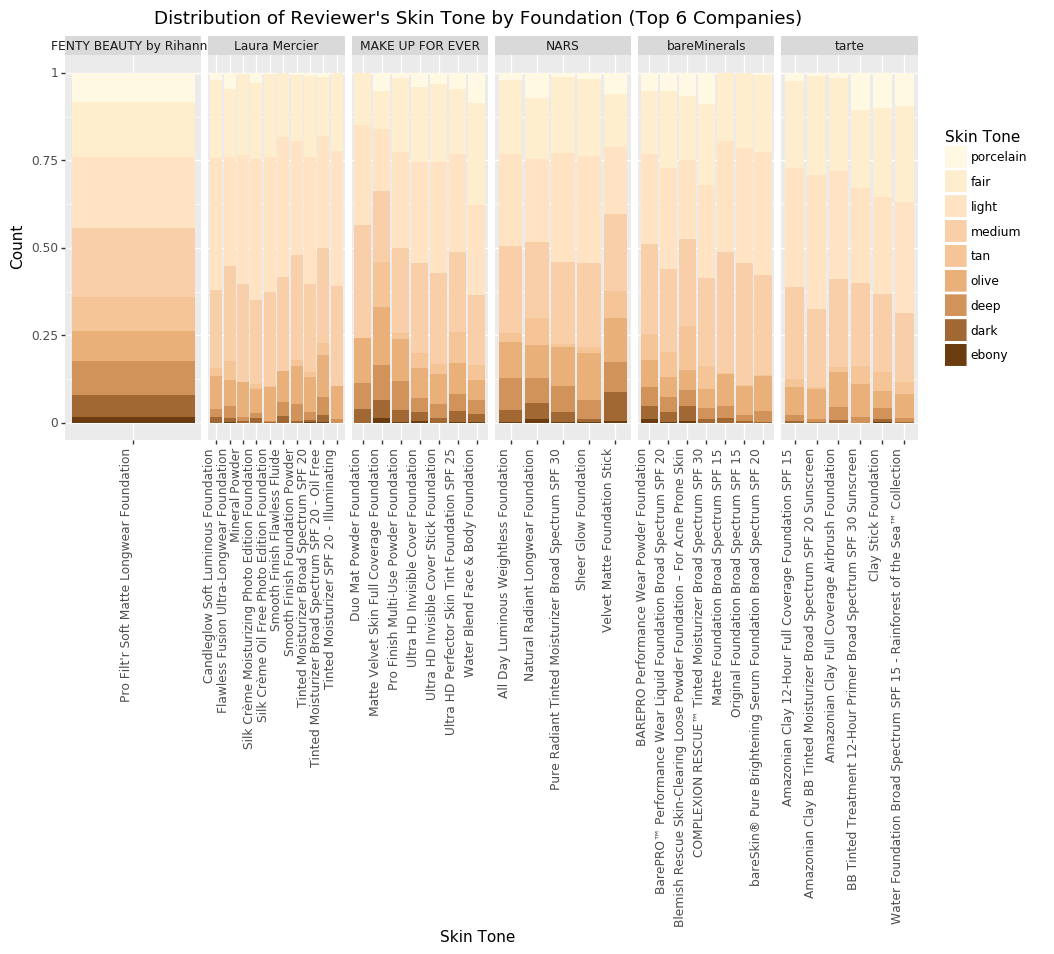

<ggplot: (7548061416)>

In [74]:
#5 most prevalent brands facet by brand
top_5_brand=skin100[skin100["brand"].isin(sorted_skin100["brand"][0:6])]
top_5_brand=top_5_brand[["brand","name","tone_val"]]


(p9.ggplot() +
geom_bar(top_5_brand, aes(x='name',fill="tone_val"),position="fill") +
#geom_point(top_5_rating, aes(x='tone_val',y='scaled_rating')) +
theme(figure_size = (11,5)) +
theme(axis_text_x=element_text(rotation=90, hjust=1)) +
ggtitle("Distribution of Reviewer's Skin Tone by Foundation (Top 6 Companies)") + 
xlab('Skin Tone') + 
ylab('Count'))+scale_fill_manual(labels =list(tone_val.keys()),values=skin_palette)+
facet_wrap('~ brand',scales = "free_x",nrow=1)+labs(fill = 'Skin Tone')

Taking the 6 most reviewed brands from our table, we have foundations from FENTY beauty by Rihanna, Tarte, Laura Mercier, MAKE UP FOR EVER, NARS, and bareMinerals. 
Although it is clear that certain brands have a higher disparity for skin tone counts of reviewers than others (namely Tarte and bareMinerals), we can see that this proportion can also notably vary even within an individual brand. For example, in MAKE UP FOR EVER, as the skin tone of a reviewer gets darker, the number of reviews that are given decline for most of their products -- except for Matte Velvet Skin Full Coverage Foundation. This makes sense, as upon research we find that the product has a whopping 39 shades compared to their average of 17. A similar phenomenon occurs for NARS with Natural Radiant Longwear Foundation and Velvet Matte Foundation Stick that has 32 and 19 shades, respectively. We see that there is a stronger representation of the BIPOC (Black, Indigenous, or People of Color) customer base for certain products which have a large variety of shades to choose from. So, why don't companies strive to be more inclusive?
FENTY, which is reknown for launching products that cover over 40 shades and founded by Rihanna, a BIPOC individual herself, has only one foundation; however we see a much more significantly even distribution of skin tones among reviewers compared to the other top companies, and all of Sephora when seeing the previous plot. Oddly enough, FENTY was only one of two brands with a BIPOC founder among 63 at Sephora.
Sephora may consider how to expand their market by diversifying the brands as well as working with greater variety of shades.

### Age
<a id="age"></a>

#### Age Distribution

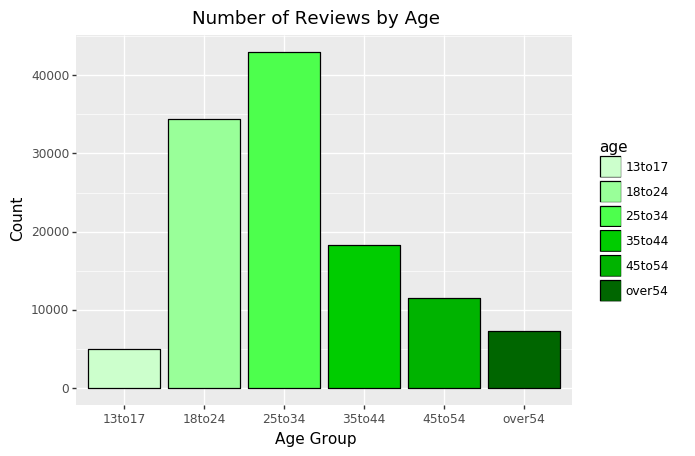

<ggplot: (-9223372029310306083)>

In [36]:
#remove NAs from age data
age_df = df[~df['age'].isna()]

(p9.ggplot(age_df, aes('age')) + 
 geom_bar(aes(fill = 'age'), color = 'black') +
 ggtitle('Number of Reviews by Age') + 
 xlab('Age Group') + 
 ylab('Count') + 
 scale_fill_manual(values = ['#ccffcc', '#99ff99', '#4dff4d', '#00cc00', '#00b300', '#006600']))

The age group that reviews the most foundations on Sephora is the 25 to 34-year-old block. After that is the 18 to 24-year-old block. The women who review the least are those between the ages of 13 and 17 and women over 54.

#### Age Distribution by Brand

In order to see how age of clientele changes by brand, we decided to plot the age distribution by brand.

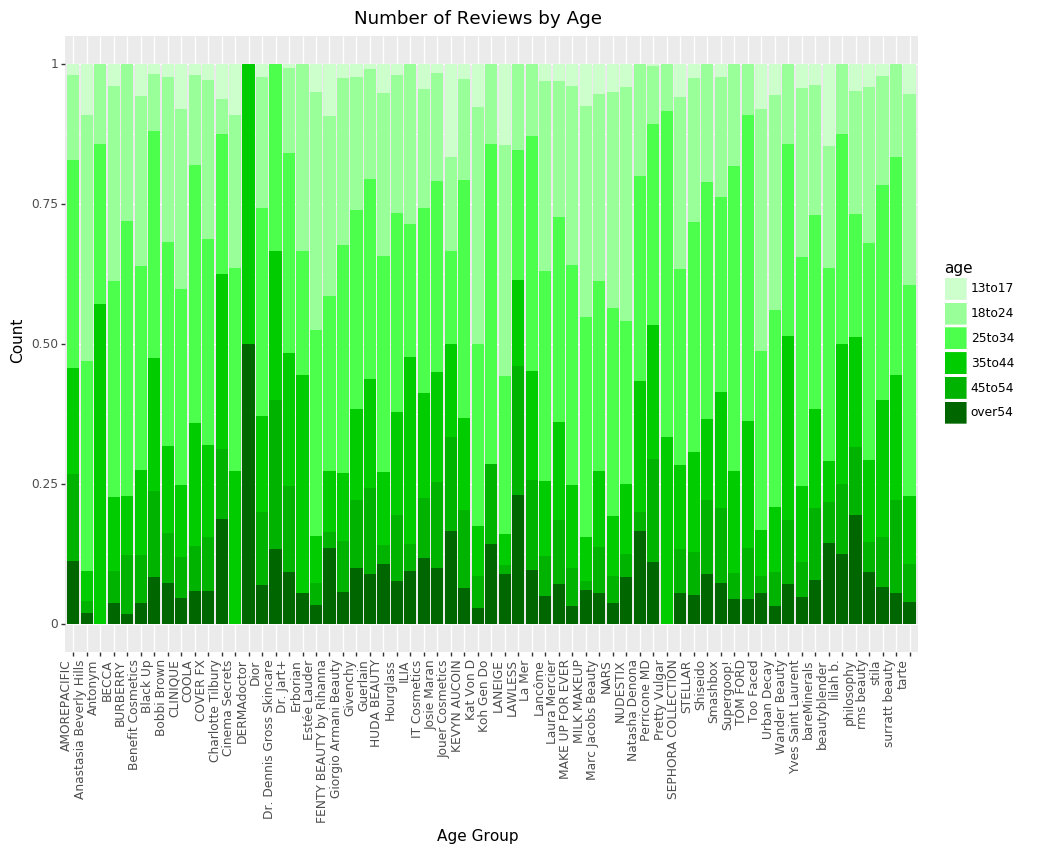

<ggplot: (-9223372029309180791)>

In [37]:
(p9.ggplot(age_df, aes(x = 'brand', fill = 'age')) + 
 geom_bar(position = 'fill') +
 ggtitle('Number of Reviews by Age') + 
 xlab('Age Group') + 
 ylab('Count') + 
 theme(axis_text_x=element_text(rotation=90, hjust=1)) +
 theme(figure_size = (11,8)) + 
 scale_fill_manual(values = ['#ccffcc', '#99ff99', '#4dff4d', '#00cc00', '#00b300', '#006600']))

One of the interesting features of this plot is how many women over the age of 54 use DERMADoctor whereas no women of that age group reviewed Pretty Vulgar products. Products that are popular among women older than 54 also include Charlotte Tilburry and Natasha Dedona, contemporary, luxury makeup brands as well as Philosphy and Jouer Cosmetics. 

On the other end of the spectrum, brands that are more popular among 13 to 17-year-olds and 18 to 24-year-olds include Kat Von D, Laneige (one of my personal favorites), Nudestix, and Too Faced.

The major takeaway from this plot is that brands have different customer bases that are based partially on age. This makes sense because brands tend to have specific markets they target when they create their products.

### Where are People Reviewing Products?
<a id="wherepplrevprod"></a>

One of the assumptions we have made is that the reviewing population at Sephora is representative of the total customer population at Sephora. Thus, we wanted to see where foundation reviewers lived. Unfortunately, much of the review data when it came to location was missing, or we were not able to find exact longitude and latitude coordinates for the locations. In the end, the plot below only shows about one percent of the total reviews at Sephora, so we have to be careful about extrapolating what we see.

In [38]:
location_db = df[~df['location'].isna()]
location_db['location'] = location_db['location'].astype(str)

# separate city and state
new = location_db['location'].str.split(",", n = 1, expand = True) 
location_db["city"]= new[0] 
location_db["state"]= new[1] 

# remove entries that do not have a state
location_db = location_db[~location_db['state'].isna()]
location_db = location_db[location_db['state'].map(len) == 2]
location_db['state'] = location_db['state'].str.upper()

# remove entries that are not in the US
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

location_db = location_db[location_db['state'].isin(states)]

location_df = location_db.groupby(["state"]).size().reset_index(name="count")

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = location_df['state'],
        z = location_df['count'].astype(float),
        locationmode = 'USA-states',
        #text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Number of Reviews")
        ) ]

layout = dict(
        #title = 'Number of Reviews by State<br>(Hover for breakdown)',
        title = 'Number of Reviews by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

fig = dict( data=data, layout=layout )
py.tools.set_credentials_file(username='san1997',api_key='1lGjAJySlluIsg6LpUnU')
plotly.plotly.iplot(fig, filename='d3-cloropleth-map' )

After removing cities outside of the U.S. and reviews which did not indicate the state, we were only left with 2796 entries. This is only about 1% of the total data. Because so many reviews are missing the city and state, we are unable to do an in-depth analysis of which brands are favored among different states, the distribution of skin types across states, etc. However, from the data that we do have we can see that California, New York, Texas, and Florida have the most reviews. This is not surprising becasue these states are also the most populous in the country. 

### When are People Reviewing Products?
<a id = 'whenpplrevprods'></a>

In [39]:
#get hour as integer
df['submission_hour'] = [int(df['first_submission_date'][i][11:13]) for i in range(len(df['first_submission_date']))]
df['last_mod_hour'] = [int(df['last_submission_date'][i][11:13]) for i in range(len(df['last_submission_date']))]

#new data frame for plotting
time = df['submission_hour']
time = time.append(df['last_mod_hour'])

sub_type = ['first']*len(df) + ['last']*len(df)

time_df = pd.DataFrame({'Type': sub_type, 'Time':time})


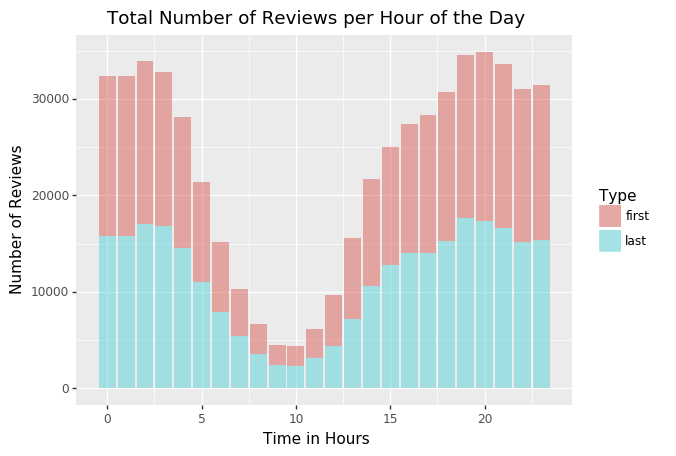

<ggplot: (-9223372029308903662)>

In [40]:
(p9.ggplot(time_df, aes('Time')) + 
 geom_bar(aes(fill = 'Type'), alpha = 0.5) +
 ggtitle('Total Number of Reviews per Hour of the Day') + 
 xlab('Time in Hours') + 
 ylab('Number of Reviews'))

The majority of people, whether they are reviewing a product for the first time or updating their old review, post their reviews on Sephora between midnight and 4:00 a.m. and after 7:00 p.m. at night. The dip follows pretty consistently with the typical 8-hour workday, which suggests that most people review products when they come home and have free time to do so. 

### Review Text Analysis
<a id = 'revtextanlys'></a>

While we do not have time to incorporate the review text in our predictive modeling for later, we did want to look at a few of the word clouds to see common words that show up for reviews for the most popular foundation based on star ratings.

#### Bare Minerals Original Foundation Broad Spectrum SPF 15 Word Cloud

##### 1 Star Reviews Word Cloud

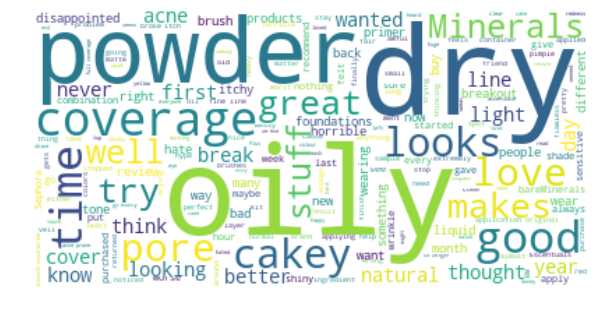

In [41]:
stopwords = set(STOPWORDS)
stopwords.update(['foundation','skin', 'make', 'product', 'face', 
                  'really', 'work', 'use', 'tried', 'color', 'got', 'say', 'actually',
                 'using', 'used', 'one', 'two', 'three', 'four','five', 'definitely', 'absolutely',
                 'bought', 'found', 'still', 'makeup', 'made', 'look', 'feel', 'will', 'though',
                 'little', 'find', 'seem', 'looked', 'Bare', 'Mineral', 'Escentual', 'bareMineral', 'much', 'lot', 'even'])

bm_df = df[df['name'] == 'Original Foundation Broad Spectrum SPF 15']
bm_df_1 = bm_df[bm_df['rating'] == 1]
wordcloud1 = WordCloud(stopwords = stopwords, background_color="white").generate(' '.join(bm_df_1['review_text']))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.gcf().set_size_inches(10,10)
plt.show()

##### 5 Star Review Word Cloud

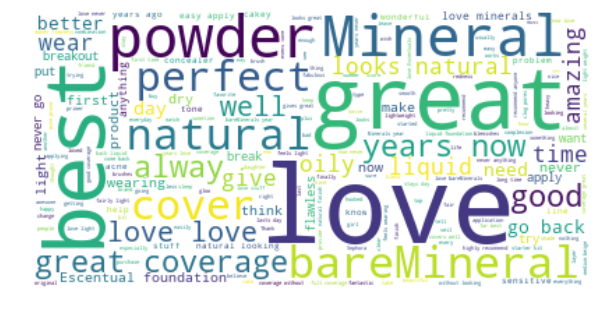

In [42]:
bm_df_5 = bm_df[bm_df['rating'] == 5]
wordcloud5 = WordCloud(stopwords = stopwords, background_color="white").generate(' '.join(bm_df_5['review_text']))
plt.imshow(wordcloud5, interpolation='bilinear')
plt.axis("off")
plt.gcf().set_size_inches(10,10)
plt.show()

In [43]:
bm_df[['coverage', 'finish', 'formulation', 'oily_skin', 'dry_skin', 'combo_skin', 'normal_skin']].iloc[0]

coverage        Medium
finish         Radiant
formulation      Loose
oily_skin         True
dry_skin          True
combo_skin        True
normal_skin       True
Name: 43998, dtype: object

Because we wanted to utilize the text of the reviews in some way, we decided to take the product that had the most reviews, which was Bare Mineral's Original Foundation Broad Spectrum SPF 15. What we can see is that the words become eminently more positive for five star reviews than one star reviews. We also wanted to compare the words we see in the word cloud to the words Bare Minerals used to describe this foundation. Oddly enough, we never see the word "radiant" to describe the foundation's finish. Instead, the most common word in either word cloud describing finish is "natural" and "light" finish. 

### Analyzing The Tags Data
<a id = 'anlztagdat'></a>

Instead of looking at reviews, we decided to utilize something that Sephora's review API gave us, which is tags data. Each tag is found in a review, and they have counts. Thus, we can find words that pertain more to foundation information rather than non-informative words such as, "awesome" or "amazing".

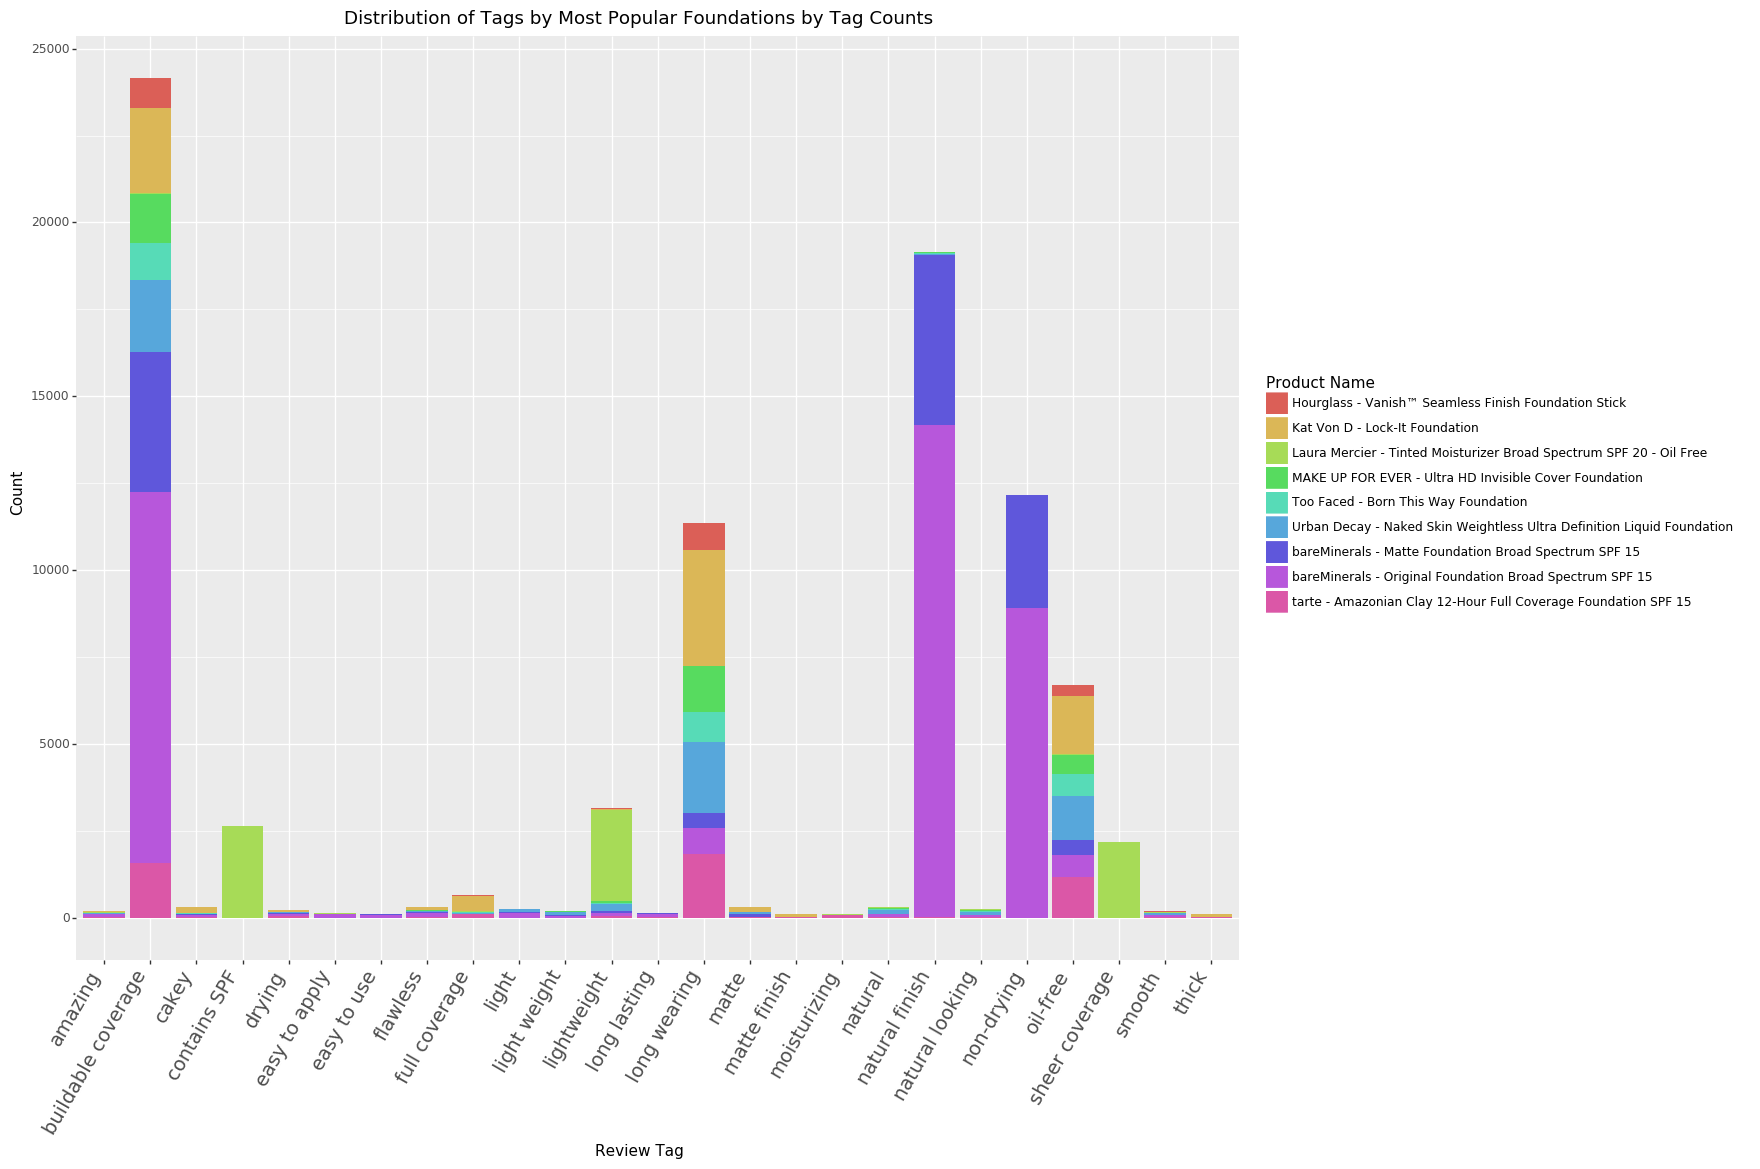

<ggplot: (7548394788)>

In [52]:
tags_df = pd.read_csv('/Users/sangeetharamamurthy/Desktop/SephoraFoundationAnalysis/Datasets/Sephora_Foundation_Tags.csv')


most_pop_foundations_tags = tags_df[tags_df['total_review_count'] > 5000]

total_count = [sum(most_pop_foundations_tags[most_pop_foundations_tags['Value'] == i]['Count']) for i in most_pop_foundations_tags['Value'].unique()]
total_count_df = pd.DataFrame({'Tag': most_pop_foundations_tags['Value'].unique(),
              'Count': total_count})

total_count_df_high = total_count_df[total_count_df['Count'] > 30]

most_pop_foundations_tags = most_pop_foundations_tags[most_pop_foundations_tags['Value'].isin(total_count_df_high['Tag'])]





tags = most_pop_foundations_tags['Value'].unique()
tags = [i for i in tags if sum(most_pop_foundations_tags[most_pop_foundations_tags['Value'] == i]['Count']) > 100]

most_pop_foundations_tags = most_pop_foundations_tags[most_pop_foundations_tags['Value'].isin(tags)]

most_pop_foundations_tags['product_name'] = most_pop_foundations_tags['brand'] + ' - ' + most_pop_foundations_tags['product']

(p9.ggplot(most_pop_foundations_tags, aes(x = 'Value', y = 'Count', fill = 'product_name')) +
 geom_bar(stat='identity') +
 theme(axis_text_x=element_text(rotation=60, hjust=1)) + 
 theme(figure_size = (15,12)) + 
 ggtitle('Distribution of Tags by Most Popular Foundations by Tag Counts') + 
 theme(axis_text_x = element_text(size = 14)) +
 xlab('Review Tag') + 
 labs(fill = 'Product Name'))

In order to get an idea of what tags are the most popular in reviews, I took the foundations that had at least 5000 total counts for all of their tags and plotted them. The most common tags are "buildable coverage", "contains SPF", "lightweight", "long wearing", "natural finish", "non-drying", "oil-free", and "sheer coverage". While four of the foundations in this plot have sun protection, only Laura Mercier's Tinted Moisturizer Broad Spectrum SPF 20 - Oil Free has that tag, and it is mentioned over 2500 times in reviews. We can tell by which tags Laura Mercier's Tinted Moisturizer dominates in, what type of product we are dealing with. It leads in containing SPF, being lightweight, and having sheer coverage. All of this is not surprising because it is a tinted moisturizer and only meant to give slight coverage. The tags that have the highest number of foundations represented are "blendable coverage", "long wearing", and "oil free". This is probably because these are some of the most important features of foundation. If it cannot blend well into the skin, then no one will want the foundation. Likewise, no one wants an oily foundation because that can lead to clogged pores and makeup that melts away.

While it is interesting to look at this data, we will not be using the tags data set for our prediction models because, while we have the tags, we do not have the context of how the reviewer used the tags. For example, MAKE UP FOR EVER's Ultra Hd Invisible Cover Foundation has a few counts in the "oily" tag. There is no way of knowing whether the reviewer was saying the product is not oily or oily, and the review API only picked up "oily." This is especially confusing because this same foundation has quite a few counts in the "oil-free" tag as well. 

## Statistical Tests
<a id="statstests"></a>

### Price of Foundation by Age Group
<a id = "pricefoundagegroup"></a>

How does the price of foundation change by age group? Do older women by more expensive foundation?

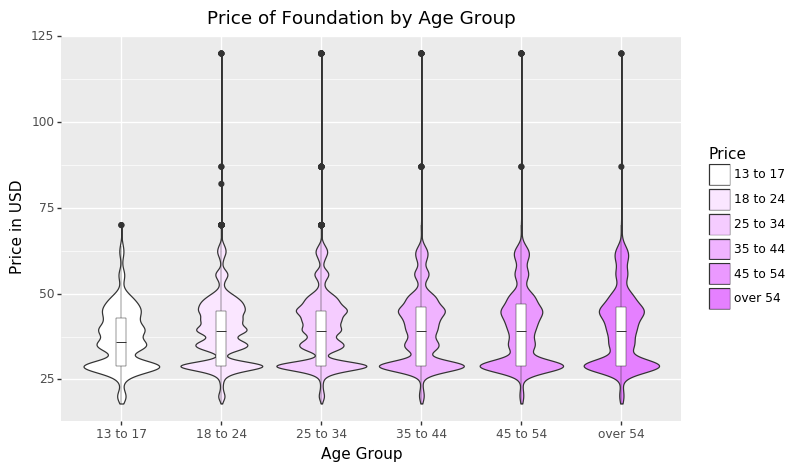

<ggplot: (-9223372029306636870)>

In [53]:
#subset total data frame to only include rows where age is not NA
dat = df.dropna(subset=['age'])
dat['age'] = [i.replace('to', ' to ') for i in dat['age']]
dat['age'] = [i.replace('over', 'over ') for i in dat['age']]

(p9.ggplot(dat, aes(x = 'age', y = 'price')) + 
 geom_violin(aes(fill = 'age')) + 
 geom_boxplot(width = 0.1, size = 0.2) +
 theme(figure_size = (8,5)) + 
 ggtitle('Price of Foundation by Age Group') + 
 ylab('Price in USD') + 
 xlab('Age Group') + 
 labs(fill = 'Price') + 
 scale_fill_manual(values=['#ffffff', '#fae6ff', '#f5ccff', '#f0b3ff', '#eb99ff', '#e580ff']))

In the plot above, we see a much clearer difference between groups. Each group represents an age group of the reviewer. This information is specified on Sephora reviews. We subsetted the original data frame to only include rows where the reviewer specified their age range. 

The plot shows what you would expect. Users between the ages of 13 and 17 do not gravitate towards products over 50 dollars, generally. And reviewers over the age of 54 tend to review more expensive products than other reviewers. The distribution of price of products between reviewers that are in the 45 to 54 age group and the over 54 age group lok to be very similar in the products they consume/review. 

In order to see more empiracally, whether or not there exists a difference in the distribution of price of foundations between age group, we ran an ANOVA test.

$H_{0}: \mu_{1} = \mu_{2} = \mu_{3} = \mu_{4} = \mu_{5} = \mu_{6}$ where $\mu_{1}...\mu_{6}$ represent the age groups 13 to 17, 18 to 24, 24 to 34, 35 to 44, 45 to 54, and over 54 respectively.

$H_{1}$: At least one $\mu_i$ in $i$ in $(1,2,3,4,5,6)$ is not equal to the rest.

In [54]:
#ANOVA TEST
mod = ols('price ~ age',
                data=dat).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
age,3.392622e+04,5.0,69.14314,1.870375e-72
Residual,1.173085e+07,119540.0,NaN,NaN


The ANOVA test confirms exactly what we thought with the plot above. The null hypothesis was that the average price of foundation between age groups is the same. The alternative hypothesis is that at least one of the age groups has a different average price of foundation than the rest. 

With a p-value as low as seen above (effectively 0), we can reject the null hypothesis and conclude that the average foundation price differ between age. Thus,there is a causal relationship between age group and price of foundation.

### Price of Foundation by Rating
<a id = "pricefoundbyrat"></a>

Is there a difference in the mean price of foundations by rating? In other words, does the rating of a foundation change by price?

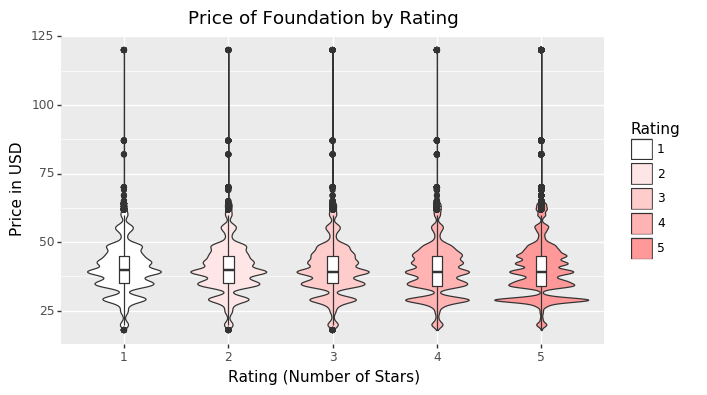

<ggplot: (-9223372029306370062)>

In [55]:
#convert ratings back to strings
df['rating'] = df['rating'].astype(str)
(p9.ggplot(df, aes(x = 'rating', y = 'price')) + 
 geom_violin(aes(fill = 'rating')) +
 geom_boxplot(size = 0.5, width = 0.1) +
 scale_fill_manual(values=["#FFFFFF", "#ffe6e6", "#ffcccc", "#ffb3b3", "#ff9999"]) + 
 ggtitle('Price of Foundation by Rating') + 
 ylab('Price in USD') + 
 xlab('Rating (Number of Stars)') + 
 labs(fill = 'Rating') + 
 theme(figure_size = (7,4)))

It is very difficult to see if there are any differences between the groups of ratings in this plot. The groups all seem to follow similar distributions in terms of price and that is probably because we only have 220 products, but over 270,000 reviews. In order to see if there really is a difference in the price of foundations based on ratings, we ran an ANOVA test. Our null hypothesis was that the average price of foundation of all the groups of ratings are the same. Our alternative hypothesis is that at least one of the ratings groups is different in its average price of foundation.

$H_{0}: \mu_{1} = \mu_{2} = \mu_{3} = \mu_{4} = \mu_{5}$ where $\mu_{1}...\mu_{5}$ represent the age groups of one-star reviews, two-star reviews, three-star reviews, four-star reviews, and five-star reviews respectively.

$H_{1}$: At least one $\mu_i$ in $i$ in $(1,2,3,4,5)$ is not equal to the rest.

In [56]:
#ANOVA TEST
mod = ols('price ~ rating',
                data=df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
rating,1.503813e+04,4.0,41.923137,3.353186e-35
Residual,2.474587e+07,275945.0,NaN,NaN


Despite our violin plot not showing much insofar as how the distribution of the price of foundations changes within different ratings groups, our ANOVA test shows that we do reject the null and thus conclude that there are differences within groups of ratings, meaning that rating of a foundation and the price of a foundation are not independent of one another.

One of the great parts of Sephora's review API is it stores tags for reviews. This means that the review engine picks up on certain words that fall into people's reviews and counts them as tags. Thus, we can see what words pop up the most with certain foundations without needing to scrape the entire text of their review.

## Correlation Matrix
<a id="corrmat"></a>

Unfortunately, not every feature in our data frame can be used for analysis. Thus, we created a correlation matrix of the review and reviewer characteristics we felt were going to be useful for our machine learning models in the next iPython notebook.

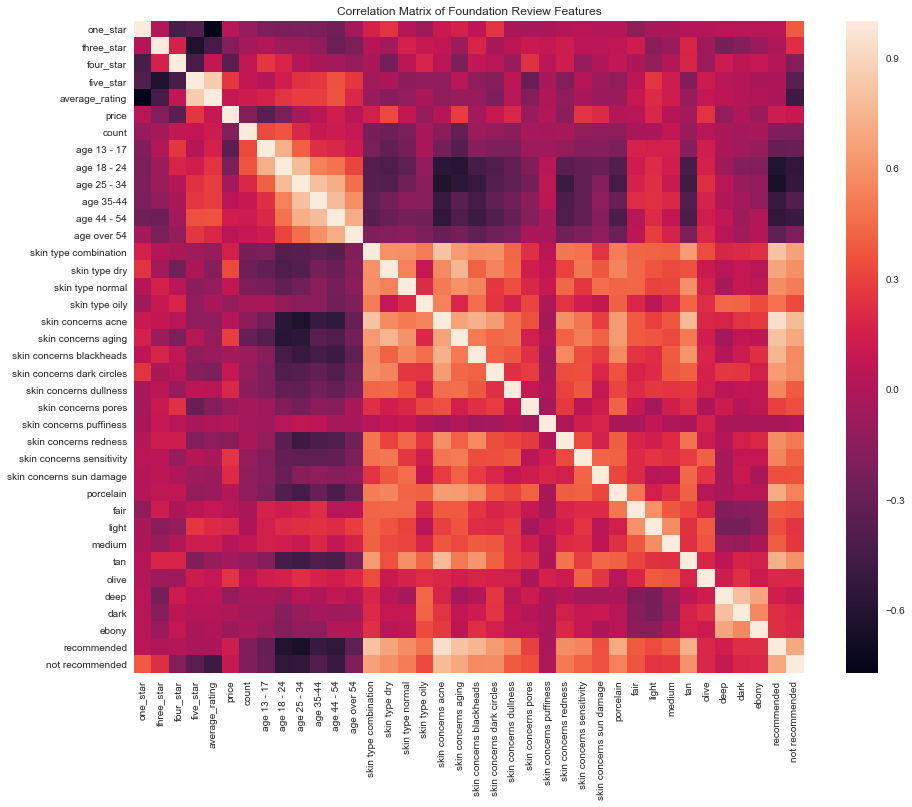

In [58]:
#convert rating column back to integer for averaging
df['rating'] = df['rating'].astype(float)

#proportions
one_star = []
two_star = []
three_star = []
four_star = []
#dummy variable drop
five_star = []

#average of total ratings
average_rating = []

#price given
price = []

#total number of reviews
count = []

#proportion
prop_rec = []
prop_not_rec = []
prop_no_rec = []

age13to17 = []
age18to24 = []
age25to34 = []
age35to44 = []
age45to54 = []
ageover54 = []
#dummy variable drop
no_age_given = []

skin_type_combination = []
skin_type_dry = []
skin_type_normal = []
skin_type_oily = []
#dummy variable drop
no_skin_type = []

skin_concerns_sensitivity = []
skin_concerns_acne = []
skin_concerns_aging = []
skin_concerns_blackheads = []
skin_concerns_redness = []
skin_concerns_darkCircles = []
skin_concerns_dullness = []
skin_concerns_sunDamage = []
skin_concerns_unevenSkinTones = []
skin_concerns_pores = []
skin_concerns_puffiness = []

#dummy variable drop
no_skin_concerns = []

skin_color_porcelain = []
skin_color_fair = []
skin_color_light = []
skin_color_medium = []
skin_color_tan = []
skin_color_olive = []
skin_color_deep = []
skin_color_dark = []
skin_color_ebony = []
no_skin_color = []

#aggregate values above for each product in data frame
for i in df['name'].unique():
    data = df[df['name'] == i]
    #data = data[~(data['recommended'].isna())]
    
    one_star.append(len(data[data['rating'] == 1])/len(data))
    two_star.append(len(data[data['rating'] == 2])/len(data))
    three_star.append(len(data[data['rating'] == 3])/len(data))
    four_star.append(len(data[data['rating'] == 4])/len(data))
    five_star.append(len(data[data['rating'] == 5])/len(data))
    
    average_rating.append(data['rating'].mean())
    
    price.append(data.iloc[0]['price'])
    
    count.append(len(data))
    
    prop_rec.append(len(data[data['recommended'] == True])/len(data))
    prop_not_rec.append(len(data[data['recommended'] == False])/len(data))
    prop_no_rec.append(len(data[data['recommended'].isna()])/len(data))
    
    age13to17.append(len(data[data['age'] == '13to17'])/len(data))
    age18to24.append(len(data[data['age'] == '18to24'])/len(data))
    age25to34.append(len(data[data['age'] == '25to34'])/len(data))
    age35to44.append(len(data[data['age'] == '35to44'])/len(data))
    age45to54.append(len(data[data['age'] == '45to54'])/len(data))
    ageover54.append(len(data[data['age'] == 'over54'])/len(data))
    no_age_given.append(len(data[data['age'].isna()])/len(data))
    
    
    skin_type_combination.append(len(data[data['skin_type'] == 'combination'])/len(data))
    skin_type_dry.append(len(data[data['skin_type'] == 'dry'])/len(data))
    skin_type_normal.append(len(data[data['skin_type'] == 'normal'])/len(data))
    skin_type_oily.append(len(data[data['skin_type'] == 'oily'])/len(data))
    no_skin_type.append(len(data[data['skin_type'].isna()])/len(data))
    
    
    skin_concerns_sensitivity.append(len(data[data['skin_concerns'] == 'sensitivity'])/len(data))
    skin_concerns_acne.append(len(data[data['skin_concerns'] == 'acne'])/len(data))
    skin_concerns_aging.append(len(data[data['skin_concerns'] == 'aging'])/len(data))
    skin_concerns_blackheads.append(len(data[data['skin_concerns'] == 'blackheads'])/len(data))
    skin_concerns_redness.append(len(data[data['skin_concerns'] == 'redness'])/len(data))
    skin_concerns_darkCircles.append(len(data[data['skin_concerns'] == 'darkCircles'])/len(data))
    skin_concerns_dullness.append(len(data[data['skin_concerns'] == 'dullness'])/len(data))
    skin_concerns_sunDamage.append(len(data[data['skin_concerns'] == 'sunDamage'])/len(data))
    skin_concerns_unevenSkinTones.append(len(data[data['skin_concerns'] == 'unevenSkinTones'])/len(data))
    skin_concerns_pores.append(len(data[data['skin_concerns'] == 'pores'])/len(data))
    skin_concerns_puffiness.append(len(data[data['skin_concerns'] == 'puffiness'])/len(data))
    
    
    skin_color_porcelain.append(len(data[data['skin_tone'] == 'porcelain'])/len(data))
    skin_color_fair.append(len(data[data['skin_tone'] == 'fair'])/len(data))
    skin_color_light.append(len(data[data['skin_tone'] == 'light'])/len(data))
    skin_color_medium.append(len(data[data['skin_tone'] == 'medium'])/len(data))
    skin_color_tan.append(len(data[data['skin_tone'] == 'tan'])/len(data))
    skin_color_olive.append(len(data[data['skin_tone'] == 'olive'])/len(data))
    skin_color_deep.append(len(data[data['skin_tone'] == 'deep'])/len(data))
    skin_color_dark.append(len(data[data['skin_tone'] == 'dark'])/len(data))
    skin_color_ebony.append(len(data[data['skin_tone'] == 'ebony'])/len(data))
    no_skin_color.append(len(data[data['skin_tone'].isna()])/len(data))
    
    #irrelevant skin concerns
    bad_names2 = ['cellulite', 'calluses', 'cuticles', 'stretchMarks']
    no_skin_concerns.append(len(data[(data['skin_concerns'].isna()) | (data['skin_concerns'].isin(bad_names2))])/len(data))
    
    #put lists into data frame

corr_df = pd.DataFrame({'one_star': one_star,'three_star':three_star,'four_star':four_star,'five_star':five_star,'average_rating':average_rating,'price':price, 'count': count, 
            'age 13 - 17':age13to17, 'age 18 - 24':age18to24, 'age 25 - 34':age25to34, 'age 35-44':age35to44, 'age 44 - 54':age45to54, 'age over 54':ageover54,
            'skin type combination':skin_type_combination, 'skin type dry':skin_type_dry, 'skin type normal':skin_type_normal, 'skin type oily':skin_type_oily,
            'skin concerns acne':skin_concerns_acne,'skin concerns aging':skin_concerns_aging,'skin concerns blackheads':skin_concerns_blackheads, 'skin concerns dark circles':skin_concerns_darkCircles,
            'skin concerns dullness':skin_concerns_dullness, 'skin concerns pores':skin_concerns_pores, 'skin concerns puffiness':skin_concerns_puffiness, 'skin concerns redness':skin_concerns_redness,
            'skin concerns sensitivity':skin_concerns_sensitivity, 'skin concerns sun damage':skin_concerns_sunDamage,
            'porcelain':skin_color_porcelain, 'fair': skin_color_fair, 'light': skin_color_light,
            'medium': skin_color_medium, 'tan': skin_color_tan, 'olive': skin_color_olive,
            'deep': skin_color_deep, 'dark': skin_color_dark, 'ebony': skin_color_ebony,
            'recommended': prop_rec, 'not recommended': prop_not_rec})

#create correlation matrix
sns.heatmap(corr_df.corr()).set_title('Correlation Matrix of Foundation Review Features')
sns.set(rc={'figure.figsize':(15,12)})

From the correlation matrix above, we can see that there are some features of reviews that correlate with one another. For example, aging skin concerns trend positively with dry and normal skin types but have almost no correlation with oily skin types. The reason for this can be explained by the fact that oily skin ages better than dry skin. Another example of this that we can see is how the different skin tones trend with aging skin concerns. We see a stronger positive correlation among skin tones between porcelain and tan and aging skin concerns than we do with skin tones between deep and ebony. Again, this can be somewhat explained by the fact that darker skin tones tend to age a bit slower than lighter skin tones do.

We can also see that most people of any age group do not give recommendations (negative or positive) for products, which is seen by the light correlations between age groups and the no recommendation row in the correlation matrix.

One of the odd things about this correlation matrix is that while we see a negative relationship between five star reviews and not recommending a product (positive correlation with one star reviews and not recommending a product), we do not see the opposite effects with recommending a product. In fact, all of the star ratings have negative correlations with recommending a product, which suggests that recommending a product is less common among five-star reviewers than just not having an opinion on recommendations at all.

There do seem to be some possible multicolineraity issues between some of the variables, so that may prove to be problematic when we use logistic regression for one of our machine learning prediction models.

## Conclusions
<a id = "conclusions"></a>

1. Brands differ quite a bit in price and average rating, but there is no definitive proof that average price has any effect on average rating.

2. The most common skin type among foundation reviewers is combination skin, and the most common skin concerns are aging and acne. Acne is more common as the greatest concern among younger people while aging is the greatest concern among some of the older crowd. The oldest people who review foundations, however, are more concerned about blackheads and dark circles than aging.

3. Most reviewers are lighter in skin tone, and most brands do not cater very well to women who are of an ebondy shade or darker. The brand that achieves the most skin tone diversity is Fenty by Rihanna.

4. The brands people use change depending on age group.

5. People tend to review products during non-work hours.

6. The most common places for reviewers to live are California, Texas, New York, and Illinois.

7. There is a causual relationship between age group and the price of foundation.

8. There is also a causal relationship between rating and the price of foundation.

9. Some of the variables that we will use for prediction may be correlated with one another, which means we may suffer from a multicollinearity problem when we do our logistic regression.